# Project 2: Clustering + SVM to Predict Online Purchases
# DAV 6150

- Name: Zhengnan Li
- Repository: [Project_2/Z_Li_Project2.ipynb](https://github.com/Zhengnan817/DAV-6150/blob/5b0700d14267b43c664aca6d699e92ac88a638bc/Project_2/Z_Li_Project2.ipynb)

This is the library we are going to use for the whole project.

In [2]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 1. Introduction
For this Project, I will be working with a data set comprised of a variety of such web site metrics. My objective for Project 2 is to use clustering algorithms to create groupings of similar data observations within the provided data set, apply labels to the data observations assigned to those groupings, and then, after completing the necessary EDA and data prep work, construct an SVM model to predict the most likely categorization of any previously unseen data items. And as the data science practitioner, I will determine which features to include in my SVM models.  
In short, we will use the dataset to help the online retailers to try to determine whether or not a given site visitor will actually make a 
purchase.

### 1.1 Approach:

- 1. [Introduction](#1-Introduction): Import the data set and introduce data variables.  
- 2. [Exploratory Data Analysis](#2-Exploratory-Data-Analysis): Explore the raw dataset and do analysis based on domain knowledge.  
- 3. [Data Preparation](#3-Data-Preparation): Perform data cleaning, imputation and transformation.
- 4. [Prepped Data Review  ](#4-Prepped-Data-Review ):Explain and present post-Data Prep EDA analysis.
- 5. [Classifier Modeling](#5-Classifier-Modeling): classifier modeling work.
- 6. [Select Models](#6-Select-Models): Explain how I selected your model selection criteria and why. Also use the test dataset to predict.
- 7. [Conclusion](#7-Conclusion)

### 1.2 Data Introduction

 The data is sourced from the UCI Machine Learning repository:https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset. It is comprised of a variety of such web site metrics. After importing the dataset into the file, we can see that it has 12330 rows and 17 columns.


In [3]:
online_shop = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Project_3/src/M11_Data.csv")
online_shop.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,subgroup_code,subgroup_name,enroll_cnt,grad_cnt,grad_pct,reg_cnt,reg_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,1,All Students,658,464,71%,310,47%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,2,Female,324,246,76%,169,52%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,3,Male,334,218,65%,141,42%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,4,American Indian/Alaska Native,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,5,Black,367,248,68%,183,50%,91,25%


In [240]:
online_shop.shape

(12330, 17)

# 2. Pre Clustering EDA

In this part, we will explore the dataset's main features through various statistical charts and summary statistics involves understanding the relationships between data elements, as well as identifying potential patterns, anomalies, and trends within the data itself to gain an intuitive understanding of data, including its distribution and skewness, is the essence of exploratory data analysis (EDA). This crucial step enables us to identify anomalies or errors within the data, providing a solid foundation for subsequent data cleaning processes.

## 2.1 Statistical Summary

First, let's overview the basic statistical summary of the data set.We can see that the data set has no null and missing values. And the datatype includes int64, float64, object and bool. Also there are some duplicated values. We will analyze it in the visualization part to divide them into numerical and categorical variables.

In [241]:
online_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [242]:
# Check the unique value for each column
online_shop.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

In [243]:
duplicates = online_shop.duplicated(keep='first')
print({duplicates.sum()} )

{125}


In [244]:
# Basic statisical insight
online_shop.describe() 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## 2.2 Data Visualization

Before starting, we define the functions to be used for EDA.

In [245]:
def bar(df, columns):
    num_cols = len(columns)
    fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6), sharey=True)
    for i, column in enumerate(columns):
        value_counts = df[column].value_counts(sort=False)
        axs[i].bar(value_counts.index.astype(str), value_counts.values)
        axs[i].set_title(f'Bar Plot of {column}')
        axs[i].set_xlabel(column)
        axs[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()



def box(df, columns):
        num_cols = len(columns)
        fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
        for i, column in enumerate(columns):
            sns.boxplot(data=df, x=column, ax=axs[i])
            axs[i].set_title(f'Box Plot of {column}')
        plt.tight_layout()
        plt.show()

def hist(df, columns):
        num_cols = len(columns)
        fig, axs = plt.subplots(1, num_cols, figsize=(5 * num_cols, 6))
        for i, column in enumerate(columns):
            axs[i].hist(df[column], bins=20)
            axs[i].set_title(f'Histogram of {column}')
            axs[i].set_xlabel(column)
            axs[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

def scatter(df, column_pairs):
        num_pairs = len(column_pairs)
        fig, axs = plt.subplots(1, num_pairs, figsize=(5 * num_pairs, 6))
        if num_pairs == 1:
            axs = [axs]  # Ensure axs is iterable
        for i, (column_x, column_y) in enumerate(column_pairs):
            axs[i].scatter(df[column_x], df[column_y])
            axs[i].set_title(f'Scatter Plot of {column_x} vs. {column_y}')
            axs[i].set_xlabel(column_x)
            axs[i].set_ylabel(column_y)
        plt.tight_layout()
        plt.show()

Next, based on the content of the dataset and the attributes of each column, we divide the dataset into categorical variables and numerical variables.

In [246]:
online_shop_num = online_shop[['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues' ]]
online_shop_cate =online_shop[['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 
                       'TrafficType', 'VisitorType', 'Weekend']]

### 2.2.1 Numerical Variables

The analysis of numerical variables is primarily divided into visitor behavior analysis and page performance analysis. From the histogram and box plots, we can observe that most of the attributes have many outliers and do not follow a normal distribution. For features that do not follow a normal distribution, we can use a log transformation or other method to reduce skew and normalize the data.

| Variables                 | Definition                             | Data Type    | Distribution |  Explanation                                                                                                    |
|---------------------------|----------------------------------------|--------------|--------------|----------------------------------------------------------------------------------------------------------------|
| Administrative            | Number of administrative pages visited | Numerical    | Varied       |  Reflects the engagement level in administrative activities on the website                                     |
| Administrative_Duration   | Time spent on administrative pages     | Numerical    | Varied       |  Indicates the depth of engagement in administrative sections                                                   |
| Informational             | Number of informational pages visited  | Numerical    | Varied       |  Measures interest in informational content of the website                                                      |
| Informational_Duration    | Time spent on informational pages      | Numerical    | Varied       |  Reflects the depth of interest in informational content                                                        |
| ProductRelated            | Number of product-related pages visited| Numerical    | Varied       |  Indicates the level of interest in products                                                                    |
| ProductRelated_Duration   | Time spent on product-related pages    | Numerical    | Varied       | Shows the engagement level with product-related content                                                        |
| BounceRates               | Bounce rates of a web page             | Numerical    | Varied       |  Percentage of visitors who navigate away from the site after viewing only one page                             |
| ExitRates                 | Exit rates of a web page               | Numerical    | Varied       |  Percentage of all views on the site that a specific page was the last in the session                           |
| PageValues                | Page values of a web page              | Numerical    | Varied       |  Average value for a page that a user visited before completing an e-commerce transaction                       |

- #### Visitor behavior analysis

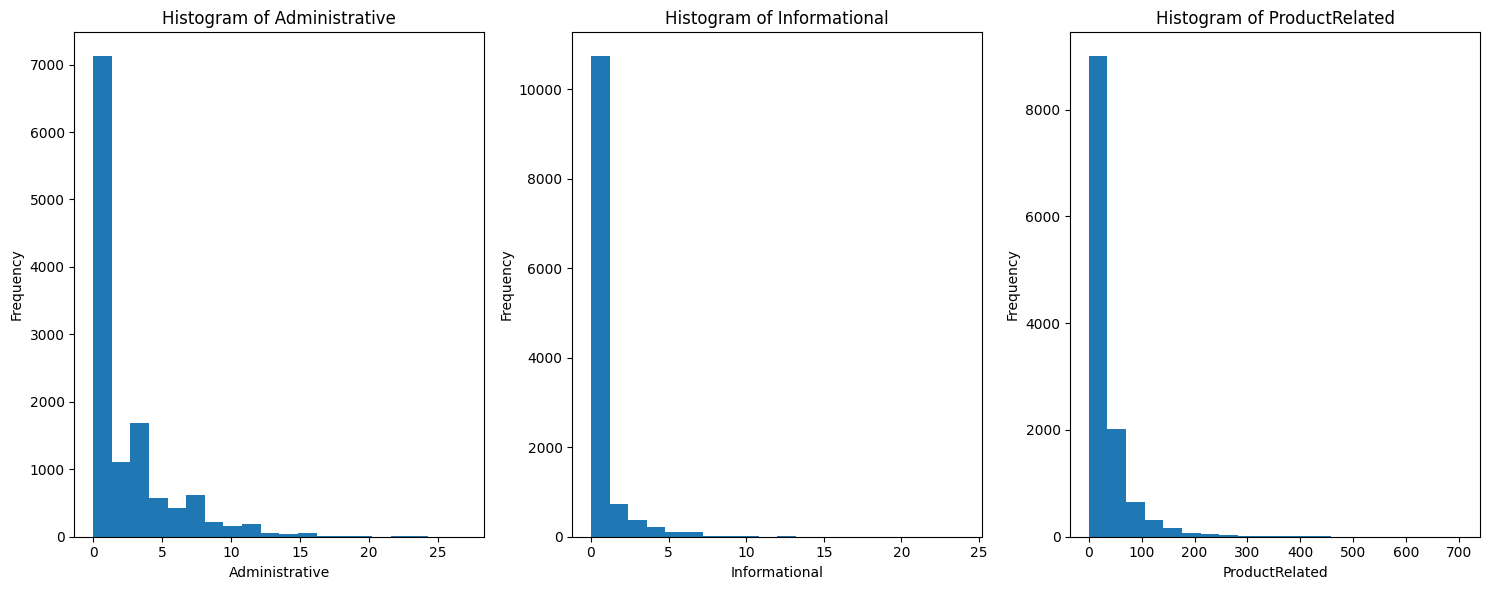

In [247]:
hist(online_shop,['Administrative','Informational', 'ProductRelated'])

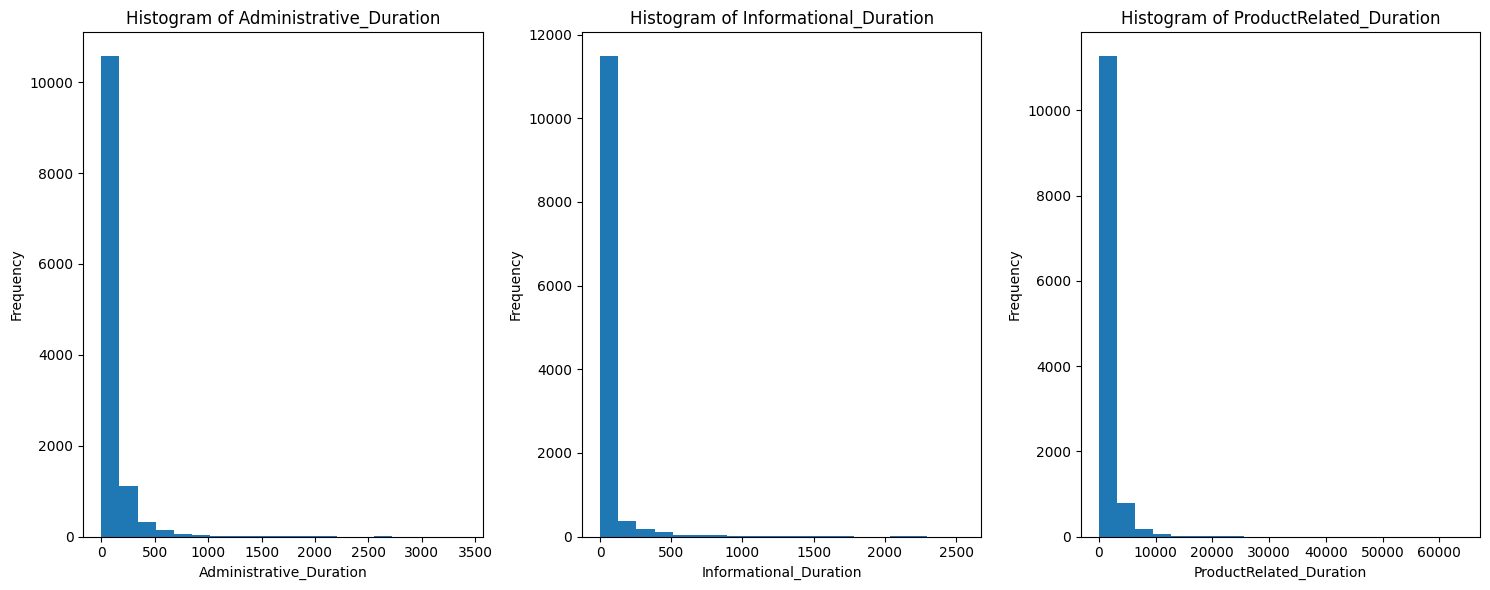

In [248]:
hist(online_shop,['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',])

- #### Page performance analysis

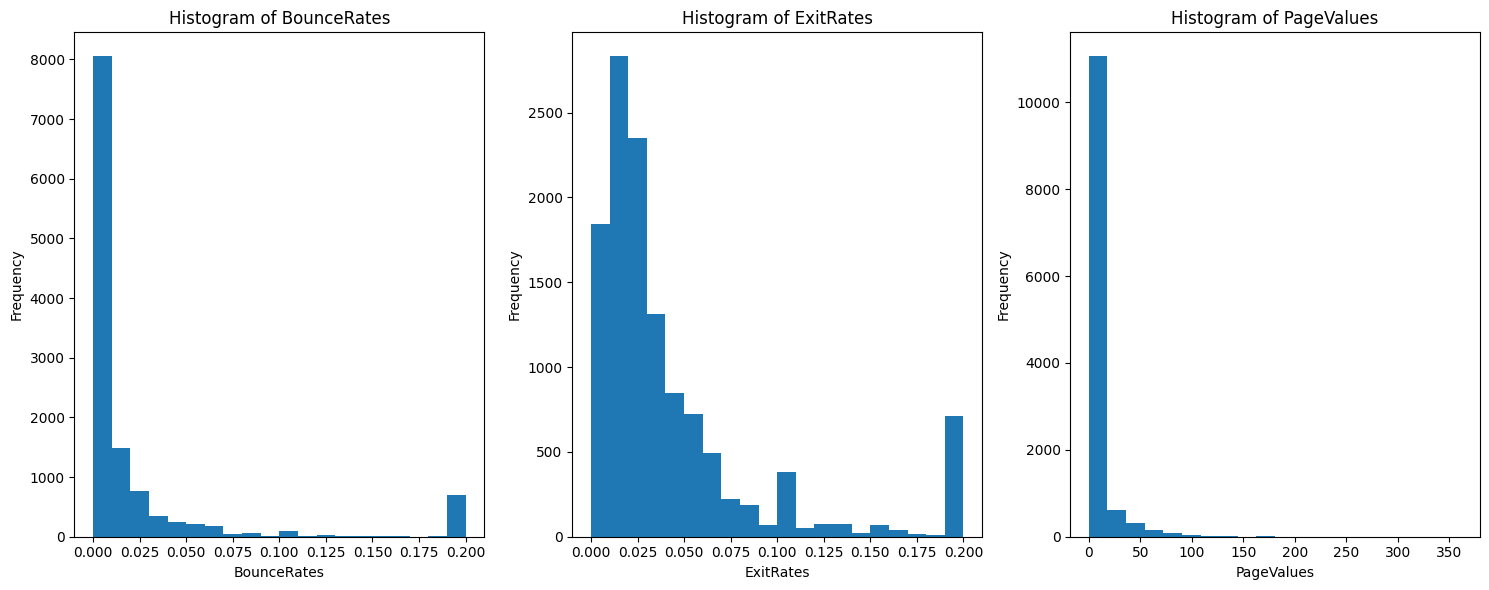

In [249]:
hist(online_shop,['BounceRates', 'ExitRates', 'PageValues'])

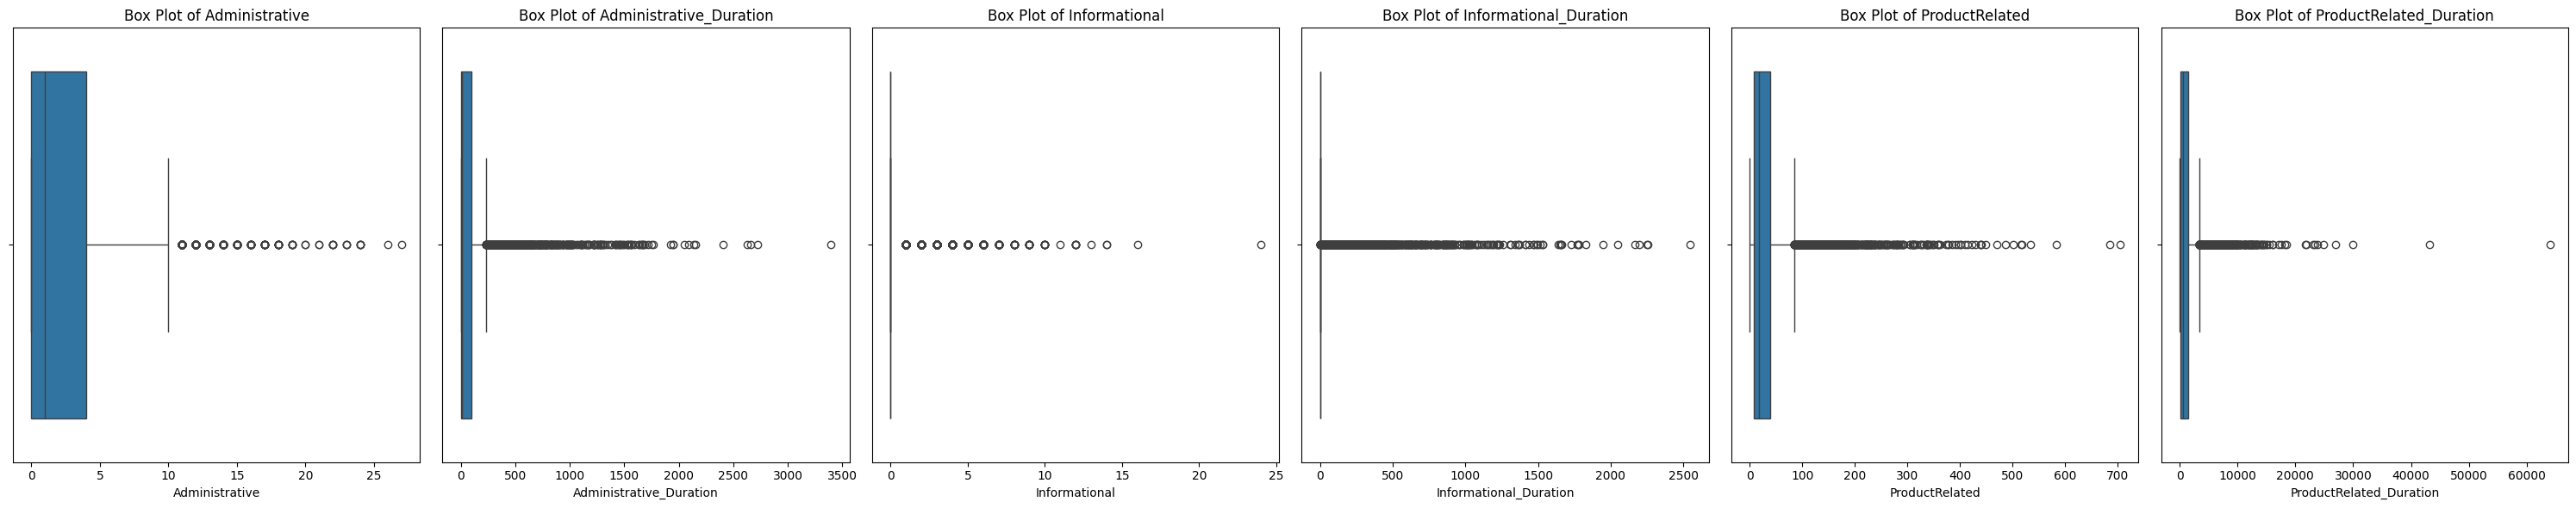

In [250]:
box(online_shop,['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',])

### Categorical Variables

| Variables                 | Definition                             | Data Type    | Distribution |  Explanation                                                                                                    |
|---------------------------|----------------------------------------|--------------|--------------|----------------------------------------------------------------------------------------------------------------|
| SpecialDay                | Closeness to a special day             | Categorical  | Varied       |  Indicates the closeness of the site visit time to a specific special day (e.g., Mother's Day, Valentine's Day) |
| Month                     | Month of the visit                     | Categorical  | Varied       |  The month of the year when the page was visited                                                                |
| OperatingSystems          | Operating system used                  | Categorical  | Varied       |  The operating system of the visiting user's device                                                             |
| Browser                   | Browser used                           | Categorical  | Varied       | The browser used by the visitor to access the website                                                          |
| Region                    | Visitor's region                       | Categorical  | Varied       |  The geographical region of the visitor                                                                         |
| TrafficType               | Type of traffic                        | Categorical  | Varied       |  The type of traffic source (e.g., direct, referral, social)                                                     |
| VisitorType               | Type of visitor                        | Categorical  | Varied       |  Whether the visitor is New or Returning                                                                        |
| Weekend                   | Weekend visit                          | Boolean      | Varied       |  Indicates whether the visit occurred on a weekend                                                              |

- #### Visitor characteristics analysis

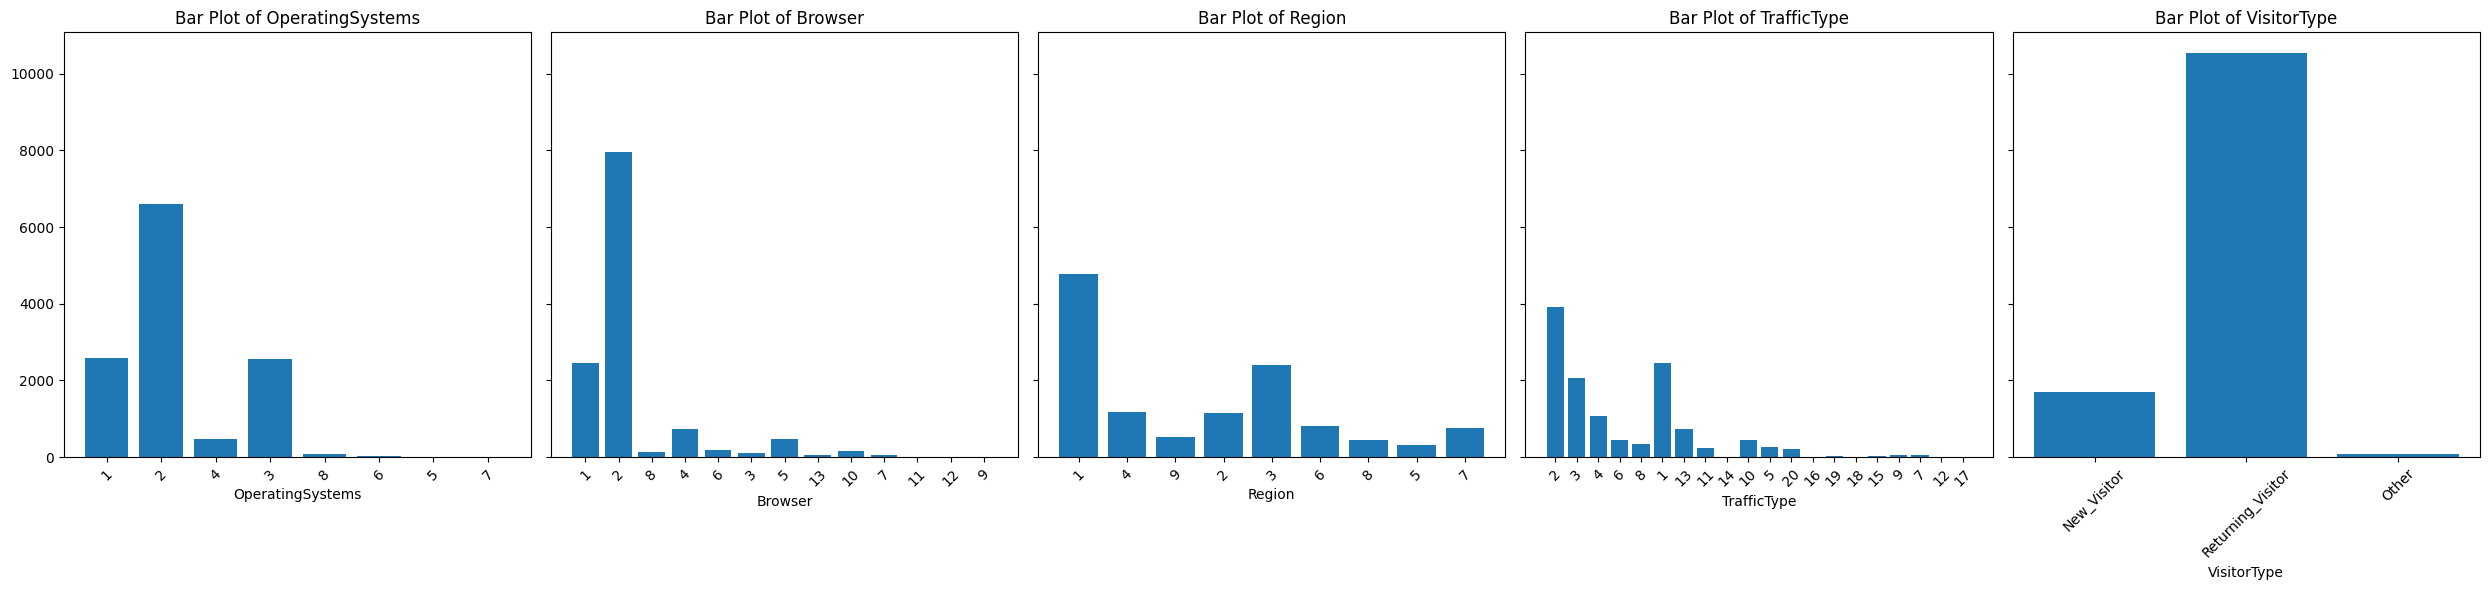

In [251]:
bar(online_shop,['OperatingSystems', 'Browser', 'Region', 
                       'TrafficType', 'VisitorType'])

- #### Time analysis

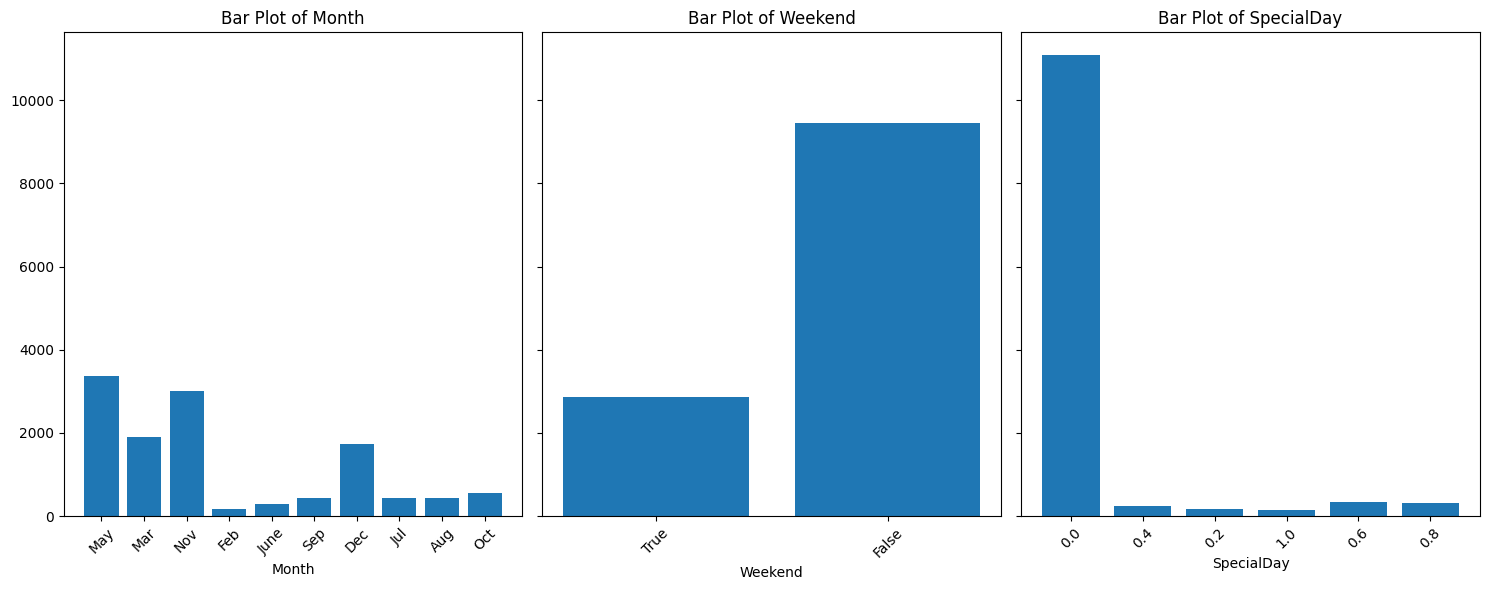

In [252]:
bar(online_shop,['Month','Weekend','SpecialDay'])

### Correlation Analysis

We use the numerical data and some categorical data to show the correlation except 'Month' and 'Visitortype' because they need further processing. We will analyze it in the future analysis.

In [253]:
online_shop

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,True
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,May,2,6,3,6,Returning_Visitor,True


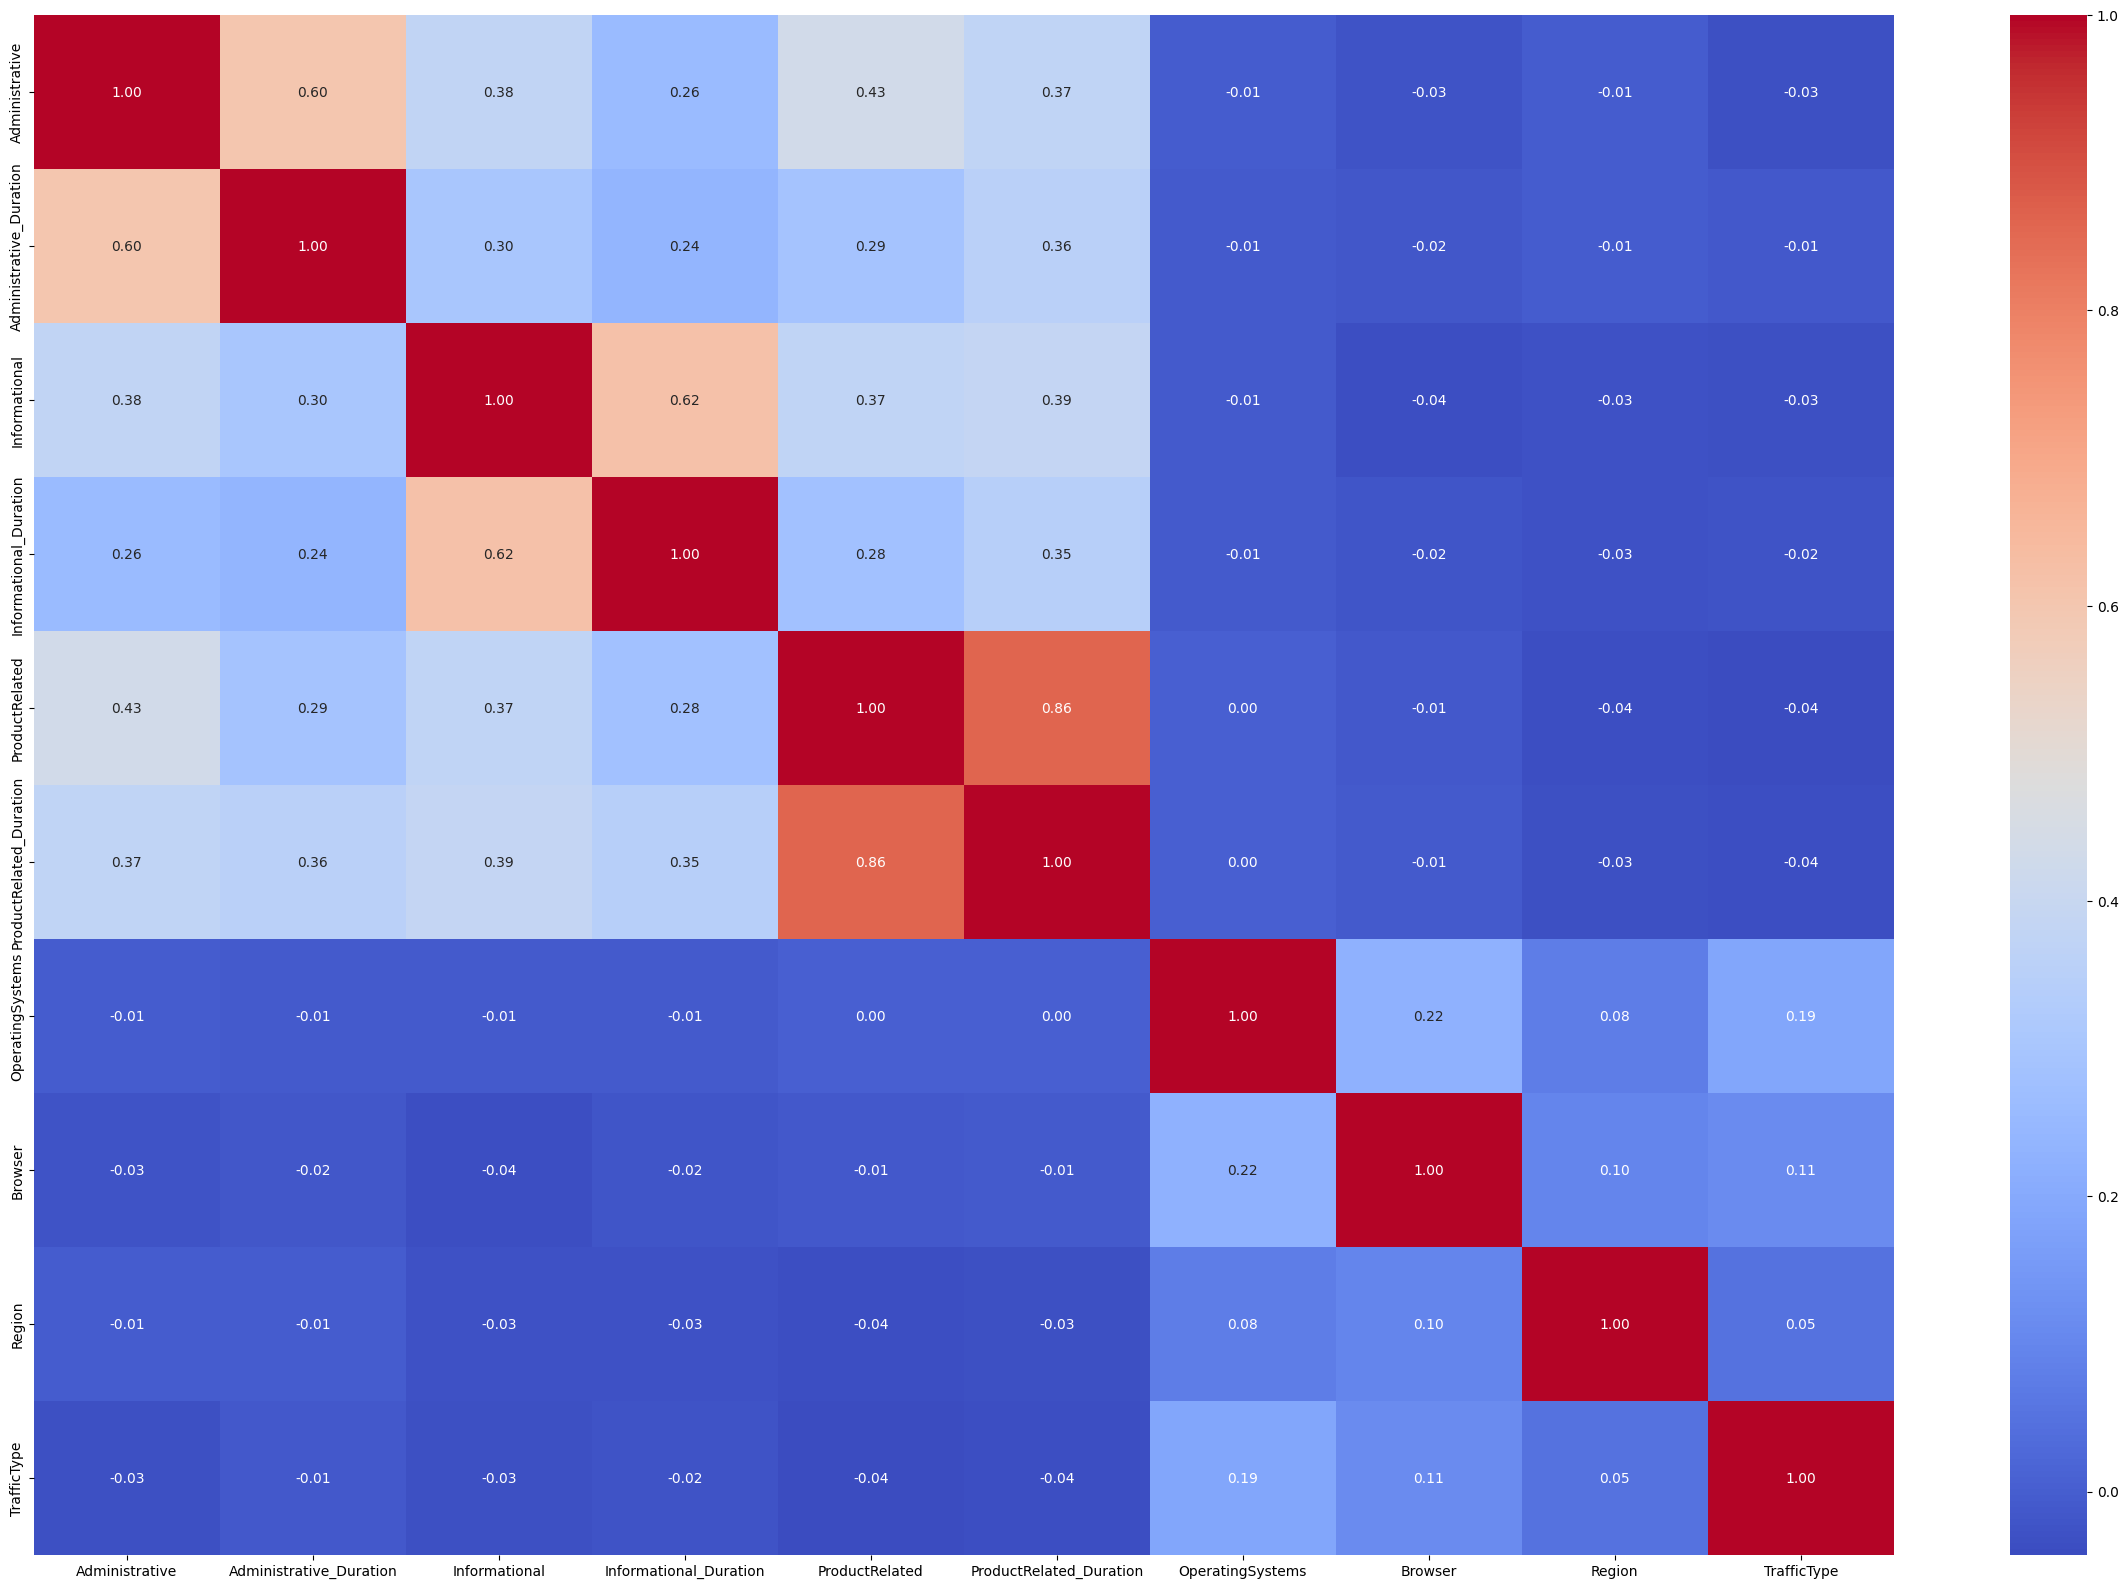

In [254]:
corr = online_shop[['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration','OperatingSystems', 'Browser', 'Region', 'TrafficType']].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 3. Pre-Clustering Data Preparation

In this part, we will prepare the numerical and categorical data for the model based on the EDA part.

## 3.1 Data cleaning

#### Duplicates
There are 125 duplicate values in EDA part. Because the dataset the data set records various activities and behavioral characteristics of visitors on the website. There are as many as 17 dimensions that describe visitor behavior. Therefore, the probability of visitors having exactly the same behavior is extremely small. We believe that duplicate rows are data collection or recording anomalies and need to be dropped.

In [255]:
duplicates = online_shop.duplicated(keep='first')
print({duplicates.sum()} )

online_shop_unique = online_shop.drop_duplicates()

{125}


#### Missing values
Using visualization method to check values. We can see there are no missing values for the whole data set.

Administrative             0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
VisitorType                0
PageValues                 0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Administrative_Duration    0
ExitRates                  0
Weekend                    0
dtype: int64

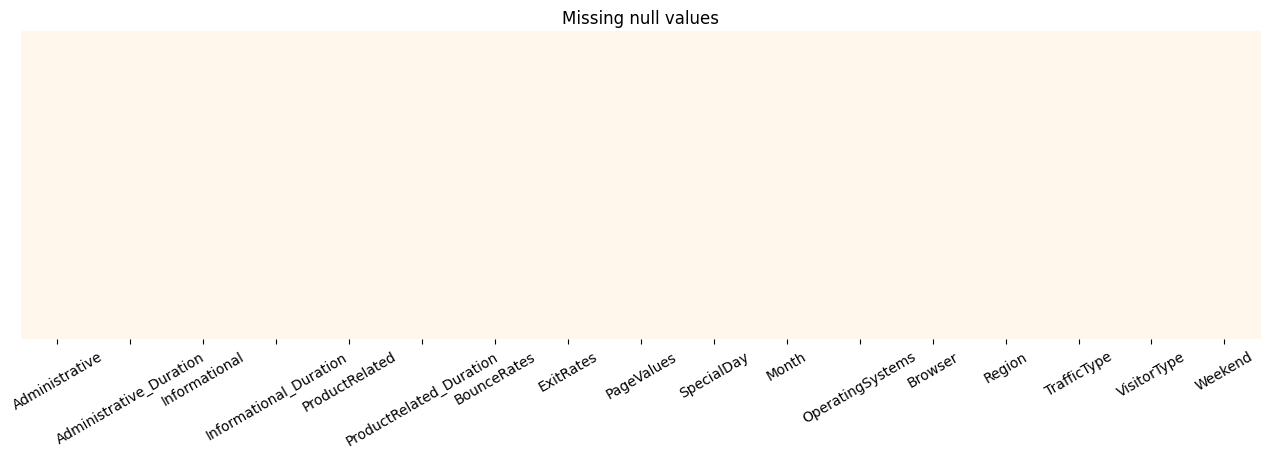

In [256]:
plt.rcParams["figure.figsize"] = (16, 4)
sns.heatmap(online_shop_unique.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
plt.xticks(rotation=30)
online_shop_unique.isnull().sum().sort_values()

## 3.2 Feature Engineering

#### Numerical data
According to the EDA part, we can see that the distribution of numerical variables is skewed and there are many outliers. Since K-means clustering and SVM are sensitive to the scale of features, Z-score normalization is used for feature scaling.

In [257]:
columns_to_scale = [
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues'
]

#Initialize StandardScaler
scaler = StandardScaler()

#Apply StandardScaler Scaling to the specified columns
df_scaled = online_shop_num.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178


#### Categorical data

By converting the month from text format to numeric format, you ensure that this column can be used effectively by the clustering algorithm. And mappping categorical values to numerical values allows this information to be incorporated into the clustering process.

- Month

In [258]:
online_shop_cate.Month.replace({'May':'5',
 'Nov':'11',
 'Mar':'3',
 'Dec':'12',
 'Oct':'10',
 'Sep':'9',
 'Aug':'8',
 'Jul':'7',
 'June':'6',       
 'Feb':'2'}, inplace = True)

- VisitorType  

In [259]:
online_shop_cate.VisitorType.replace({'Returning_Visitor': '1','New_Visitor':'2','Other':'0'},inplace = True)

- OperatingSystems

In [260]:
online_shop_cate['OperatingSystems'] = online_shop_cate['OperatingSystems'].apply(lambda x: '2' if x == 2 else 'other')

- TrifficType

In [261]:
online_shop_cate['TrafficType'] = online_shop_cate['TrafficType'].apply(lambda x: '2' if x == 2 else ('1' if x ==1 else ('3' if x ==3 else ('4'if x==4 else 'other'))))

- Browser

In [262]:
online_shop_cate['Browser'] = online_shop_cate['Browser'].apply(lambda x: '2' if x == 2 else 'other')

- Region

In [263]:
online_shop_cate['Region'] = online_shop_cate['Region'].apply(lambda x: '1' if x == 1 else ('3' if x ==3 else ('4' if x ==4 else ('2'if x==2 else 'other'))))

In [264]:
online_shop_cate

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,5,other,other,1,2,2,True
1,0.0,3,2,2,4,2,1,False
2,0.0,11,2,2,other,2,2,False
3,0.0,11,other,other,2,3,1,False
4,0.0,5,2,2,3,4,1,False
...,...,...,...,...,...,...,...,...
12325,0.0,3,2,2,1,3,1,True
12326,0.0,11,2,2,other,2,1,False
12327,0.0,7,2,2,1,other,1,False
12328,1.0,5,2,other,3,other,1,True


In [265]:
online_shop_cate = pd.get_dummies(online_shop_cate, columns=['Month','OperatingSystems','Browser','Region','TrafficType', 'VisitorType','SpecialDay'])

In [266]:
online_shop_cate.dtypes

Weekend                   bool
Month_10                  bool
Month_11                  bool
Month_12                  bool
Month_2                   bool
Month_3                   bool
Month_5                   bool
Month_6                   bool
Month_7                   bool
Month_8                   bool
Month_9                   bool
OperatingSystems_2        bool
OperatingSystems_other    bool
Browser_2                 bool
Browser_other             bool
Region_1                  bool
Region_2                  bool
Region_3                  bool
Region_4                  bool
Region_other              bool
TrafficType_1             bool
TrafficType_2             bool
TrafficType_3             bool
TrafficType_4             bool
TrafficType_other         bool
VisitorType_0             bool
VisitorType_1             bool
VisitorType_2             bool
SpecialDay_0.0            bool
SpecialDay_0.2            bool
SpecialDay_0.4            bool
SpecialDay_0.6            bool
SpecialD

In [267]:
online_shop = pd.concat([online_shop_num, online_shop_cate],axis=1)
online_shop.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,TrafficType_other,VisitorType_0,VisitorType_1,VisitorType_2,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,True,...,False,False,False,True,True,False,False,False,False,False
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,False,...,False,False,True,False,True,False,False,False,False,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,False,...,False,False,False,True,True,False,False,False,False,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,False,...,False,False,True,False,True,False,False,False,False,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,False,...,False,False,True,False,True,False,False,False,False,False


## 3.3 Prepped Data Overview

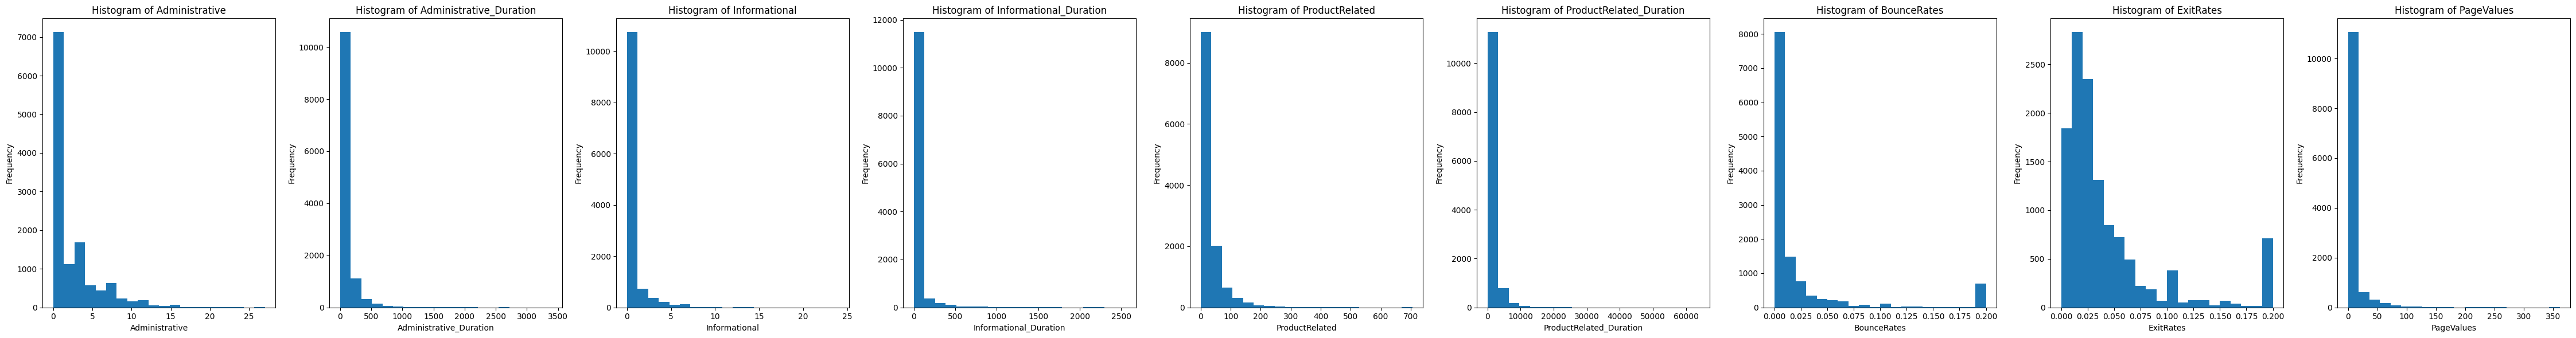

In [268]:
hist(online_shop_num,['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues'])

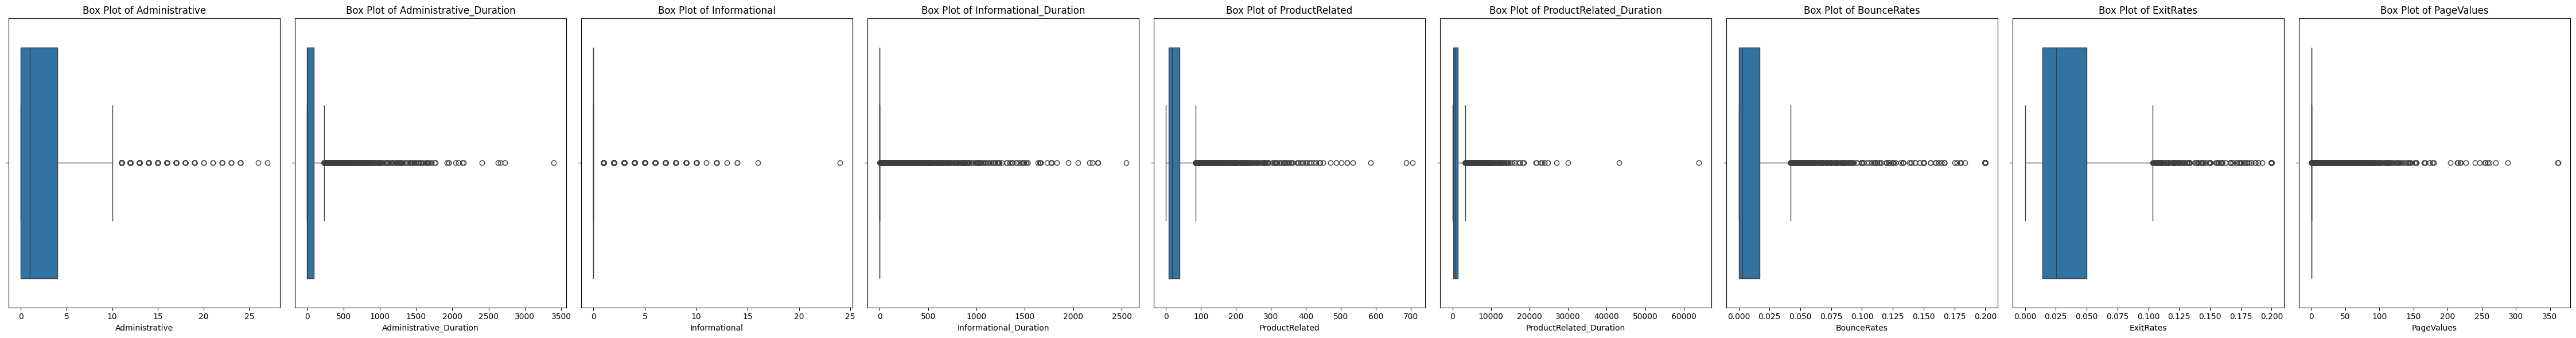

In [269]:
box(online_shop_num,['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues'])

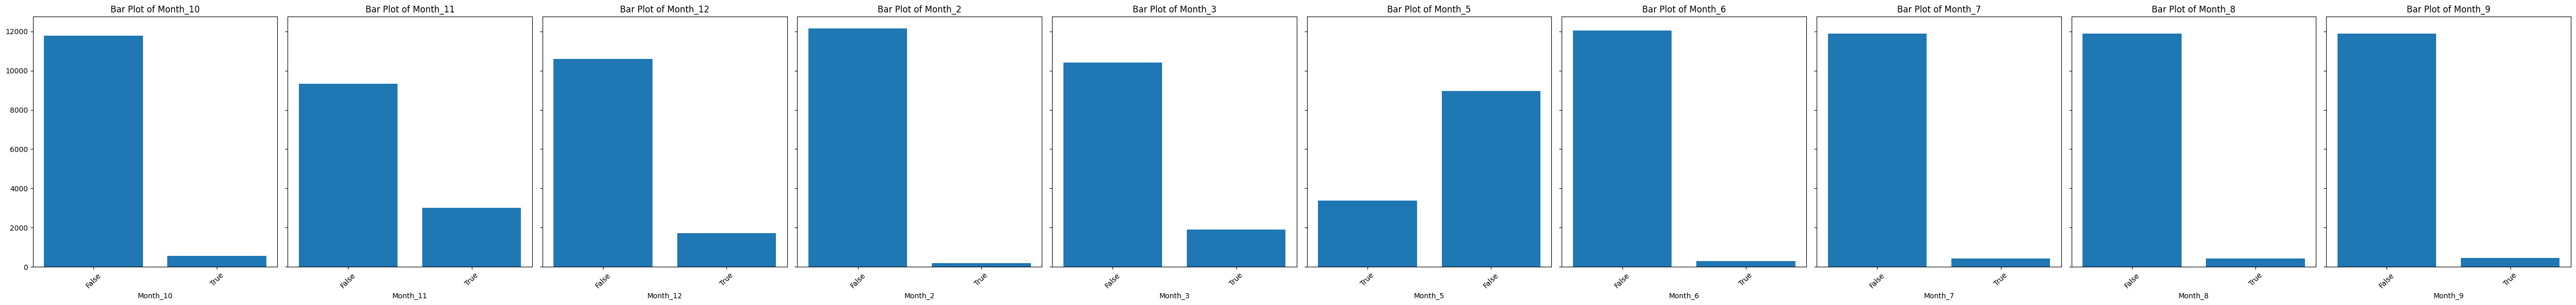

In [270]:
bar(online_shop_cate,['Month_10',  'Month_11',  'Month_12',  'Month_2','Month_3' , 'Month_5',  'Month_6',  'Month_7',  'Month_8',  'Month_9'])

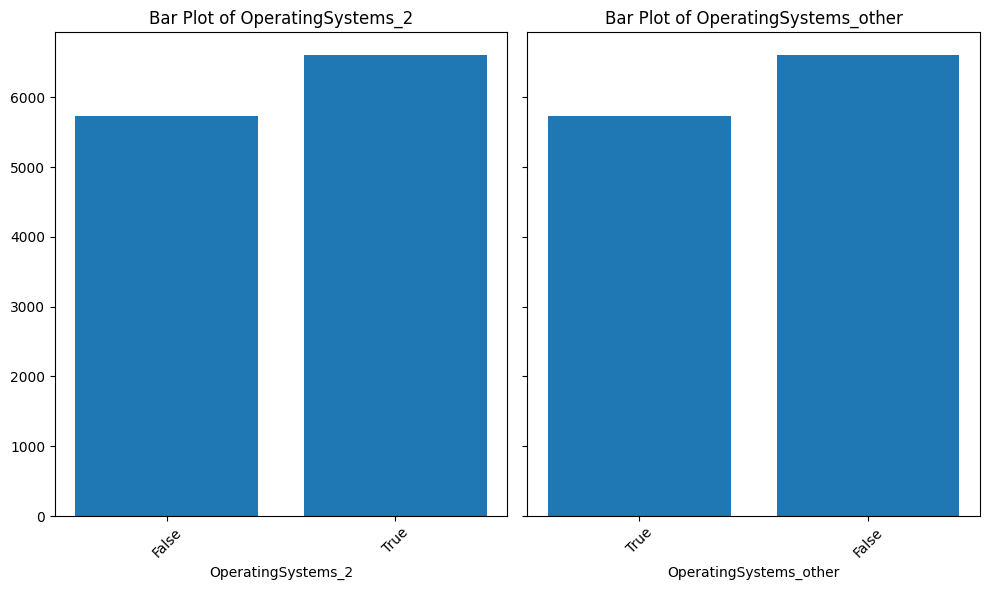

In [271]:
bar(online_shop_cate,['OperatingSystems_2', 'OperatingSystems_other'])

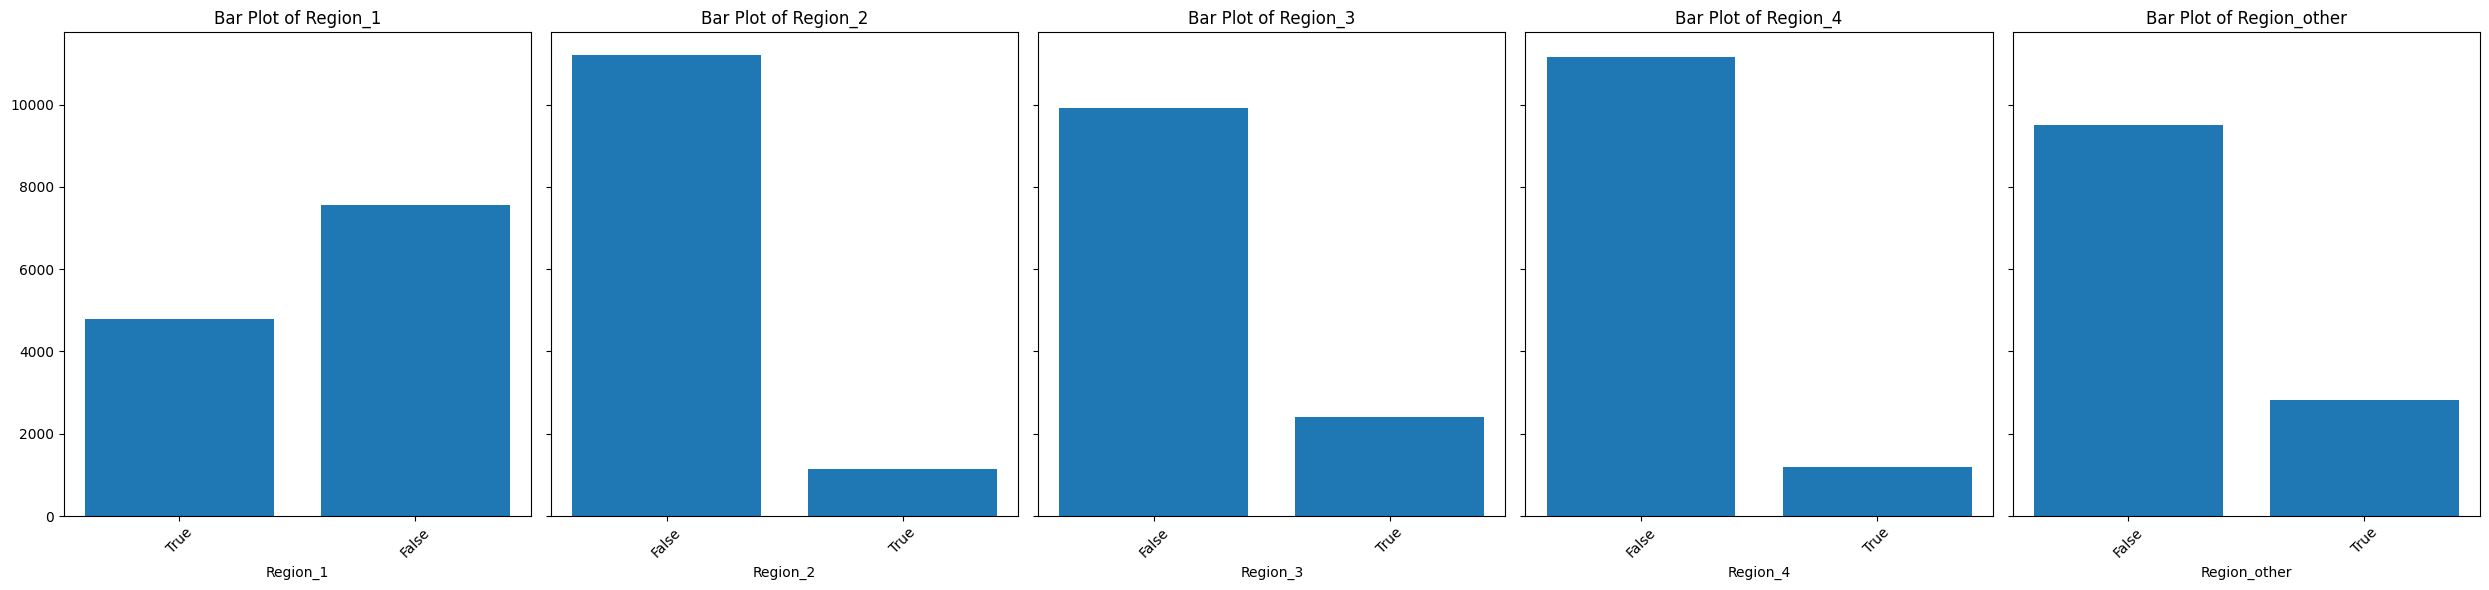

In [272]:
bar(online_shop_cate,['Region_1',  'Region_2',  'Region_3',  'Region_4',  'Region_other'])

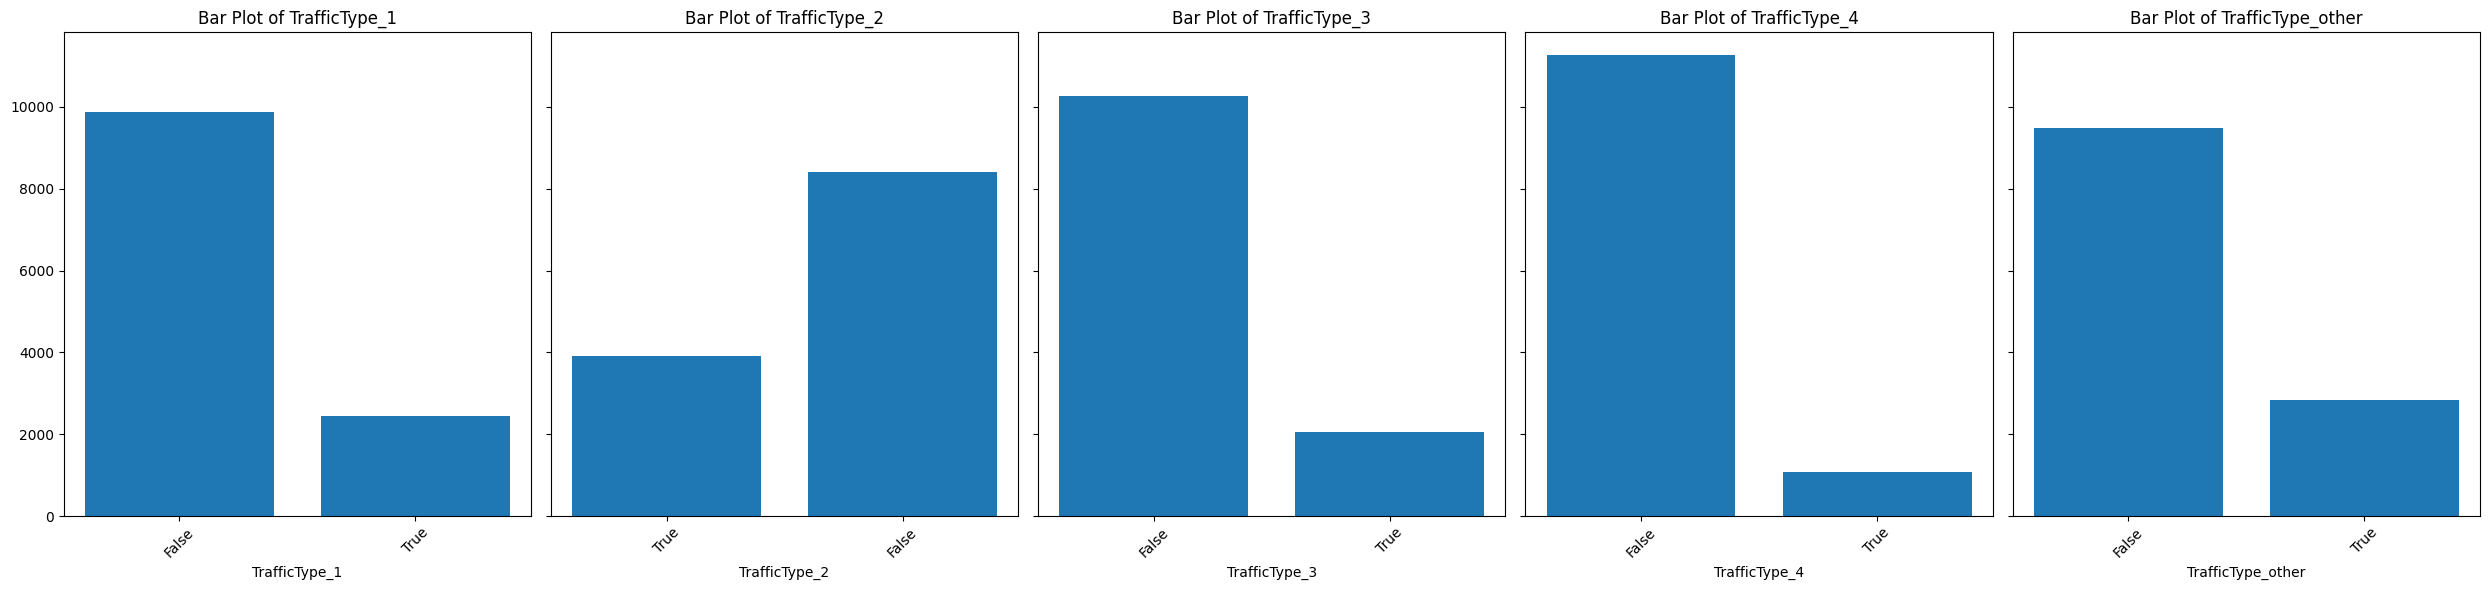

In [273]:
bar(online_shop_cate,['TrafficType_1',  'TrafficType_2',  'TrafficType_3',  'TrafficType_4',  'TrafficType_other'])

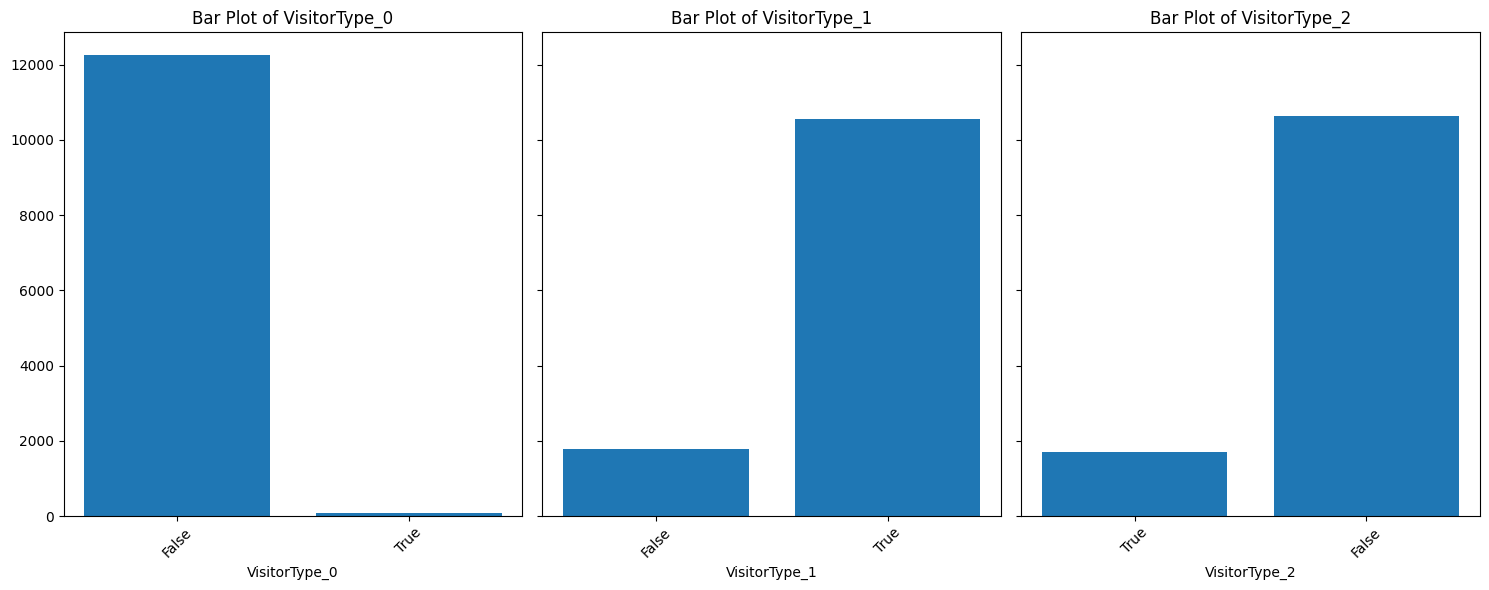

In [274]:
bar(online_shop_cate,['VisitorType_0',  'VisitorType_1',  'VisitorType_2'])

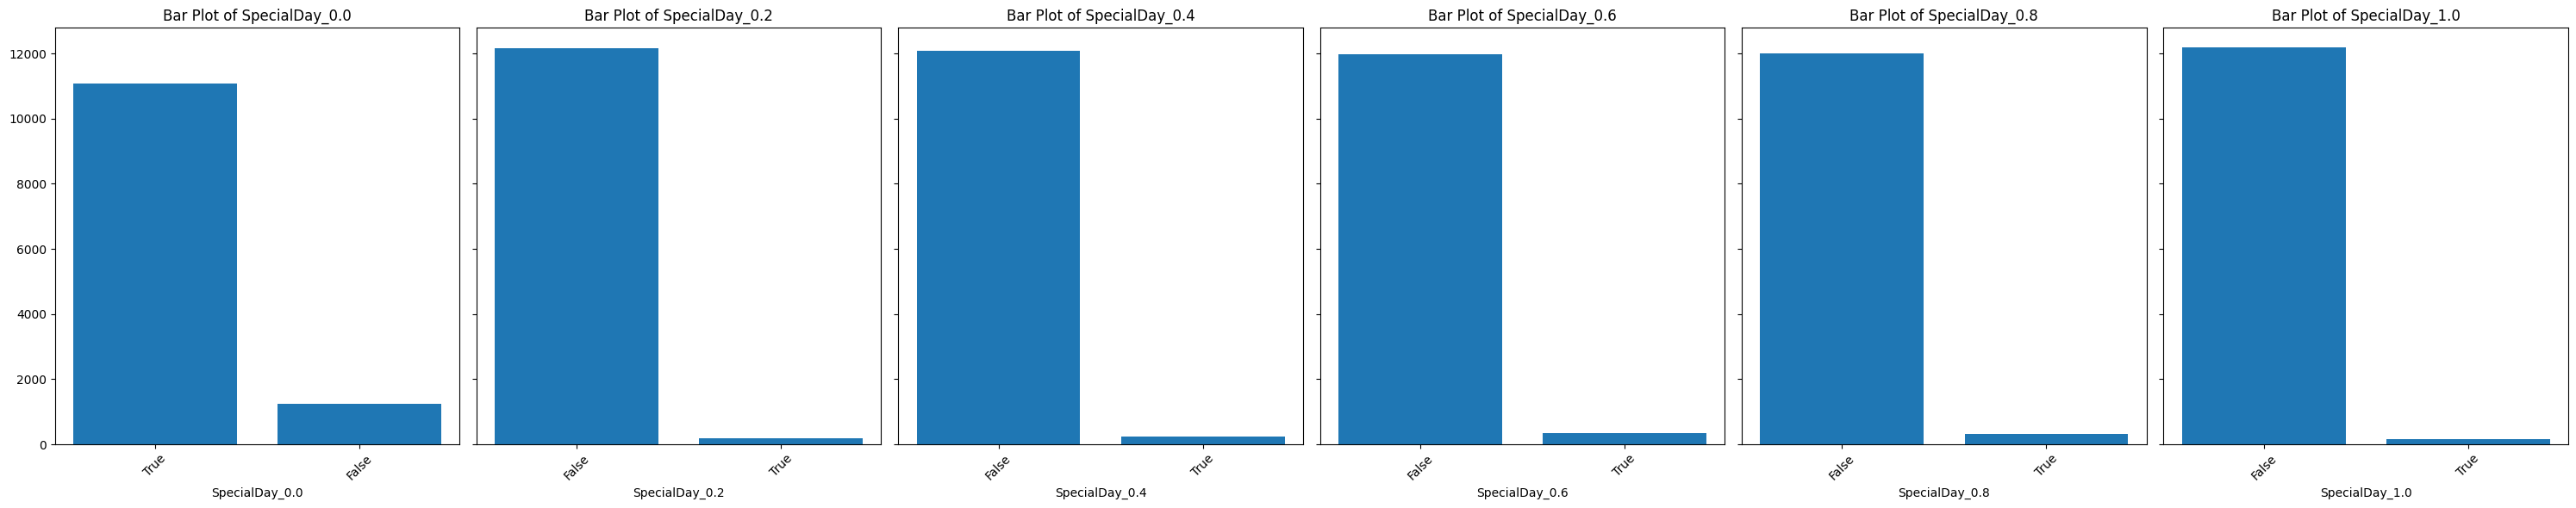

In [275]:
bar(online_shop_cate,['SpecialDay_0.0',  'SpecialDay_0.2',  'SpecialDay_0.4',  'SpecialDay_0.6',  'SpecialDay_0.8',  'SpecialDay_1.0'])

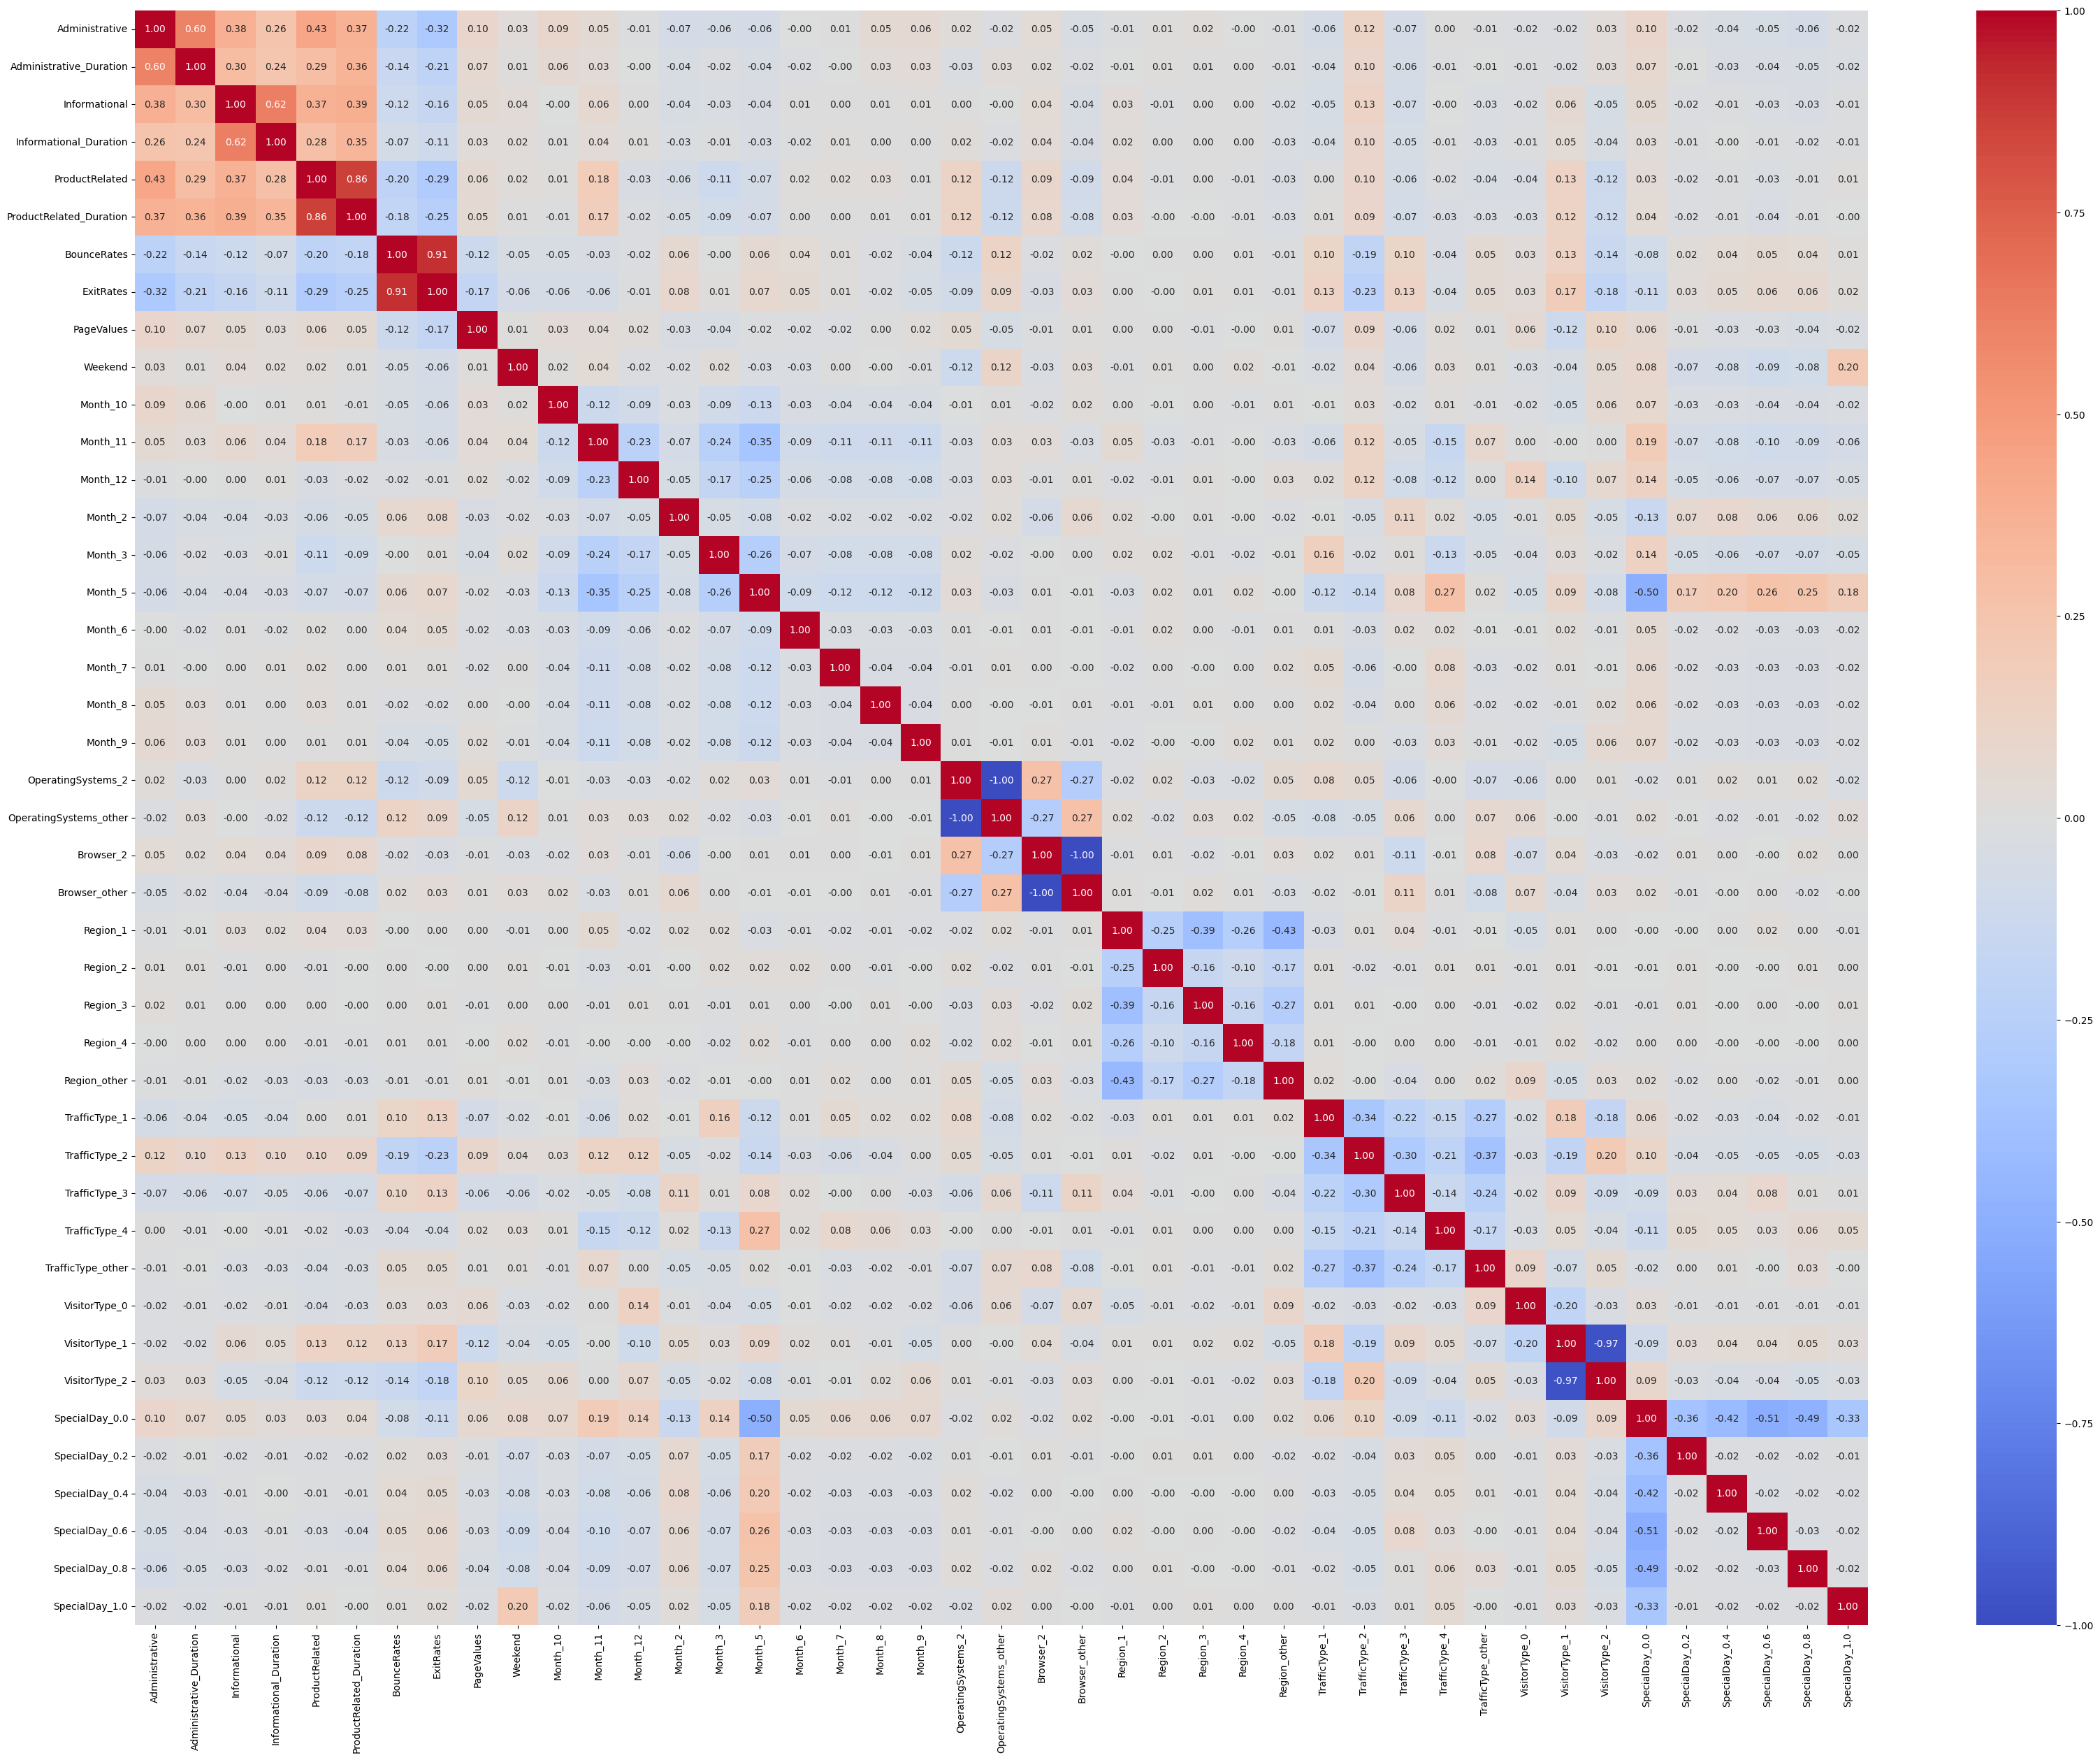

In [276]:
corr_matrix = online_shop.corr()
plt.figure(figsize=(40,30)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 4. Cluster Modeling

## 4.1 Hierarchical clustering

We will perform hierarchical clustering to construct a hierarchically nested clustering structure on this part. In this dendrogram, the longest vertical line (not cut off by other horizontal line segments) appears to be at the top of the dendrogram, suggesting that cutting at that point would produce __2__ larger clusters.

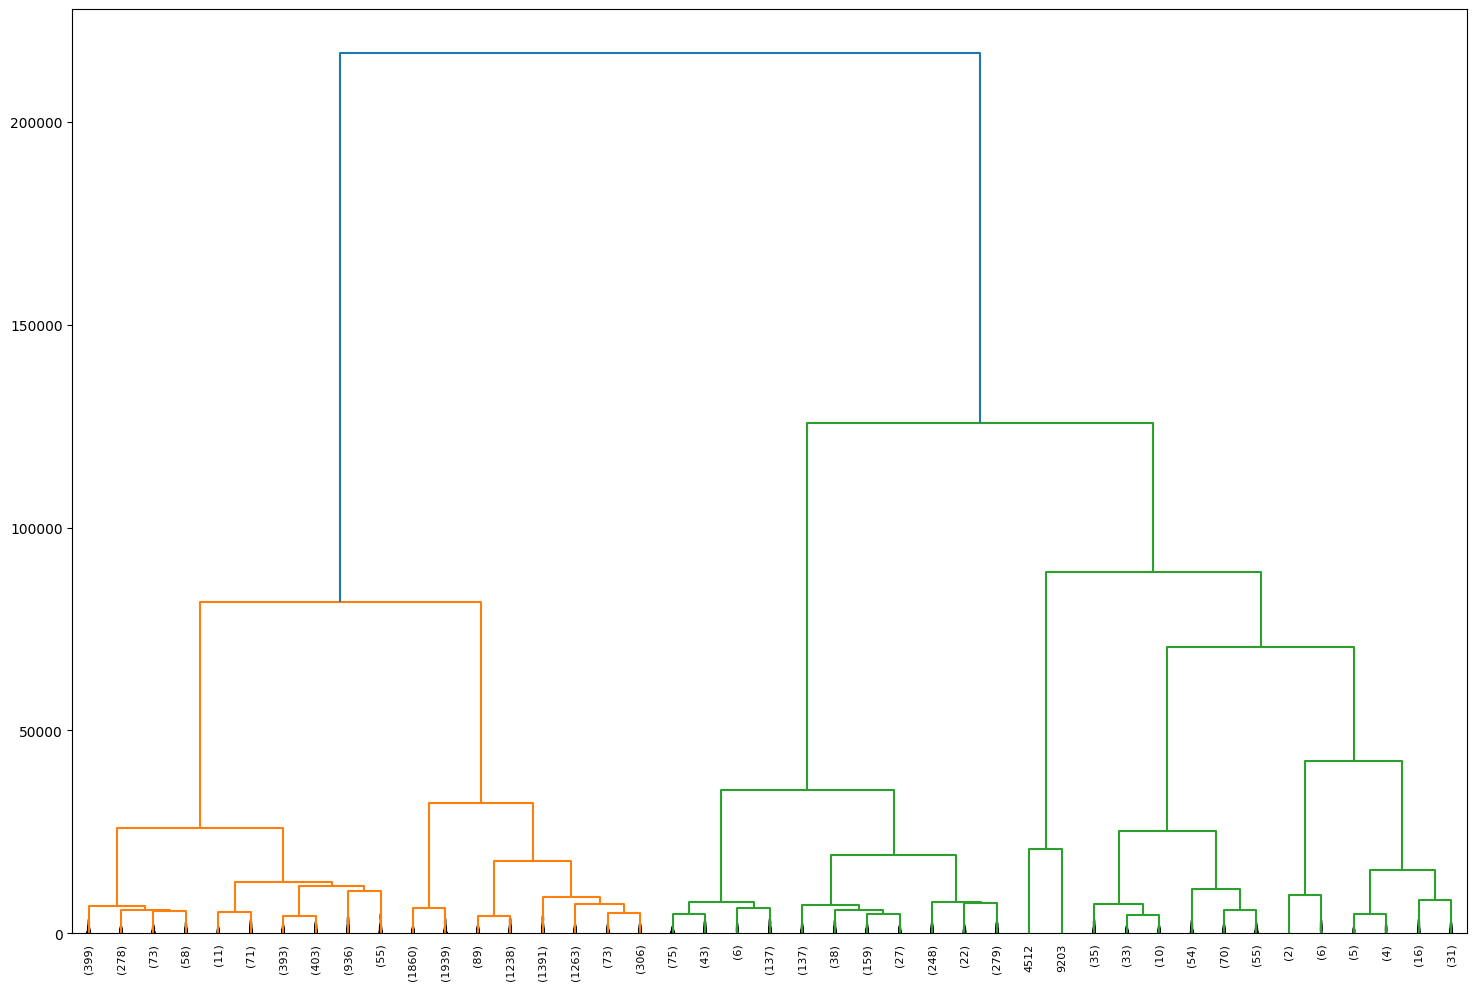

In [277]:
fig, ax = plt.subplots(figsize=(18, 12))
dend = hierarchy.dendrogram(
    hierarchy.linkage(online_shop, method="ward"),
    truncate_mode="lastp",
    p=43,
    show_contracted=True)

## 4.2 K-means clustering

- ### Elbow plot

It can be seen from the figure that as k increases, the distortion decreases rapidly, and the decrease begins to slow down when k is 2 or 3. In this case, choosing the best value of k may not be so obvious since the curve is relatively smooth and does not have an obvious "elbow" point. Therefore we may need to combine other methods such as silhouette coefficients to make decisions.

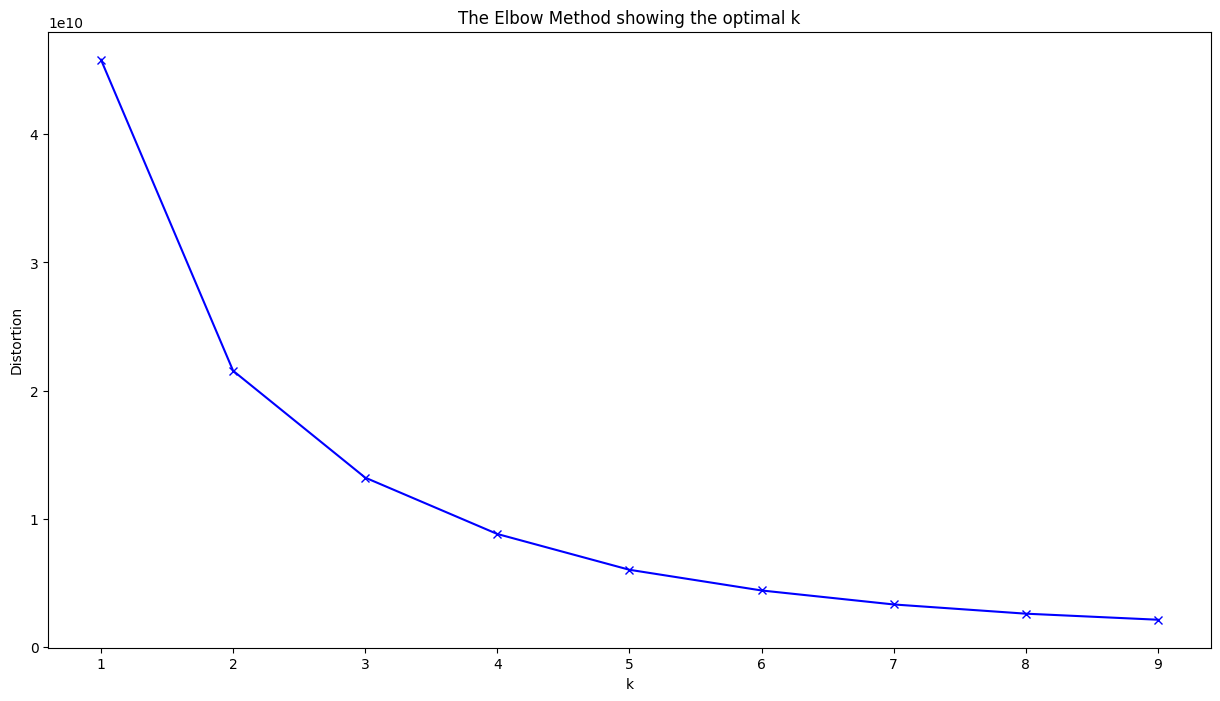

In [278]:
distortions = []
K = range(1,10) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(online_shop)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(15,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- ### Silhouette plot

As can be seen from the figure, when __k=2__, the silhouette coefficient is the highest, which indicates that each data point is well separated in its own cluster compared to other clusters. As the k value increases, the silhouette coefficient gradually decreases, which indicates that the quality of the clustering is declining.

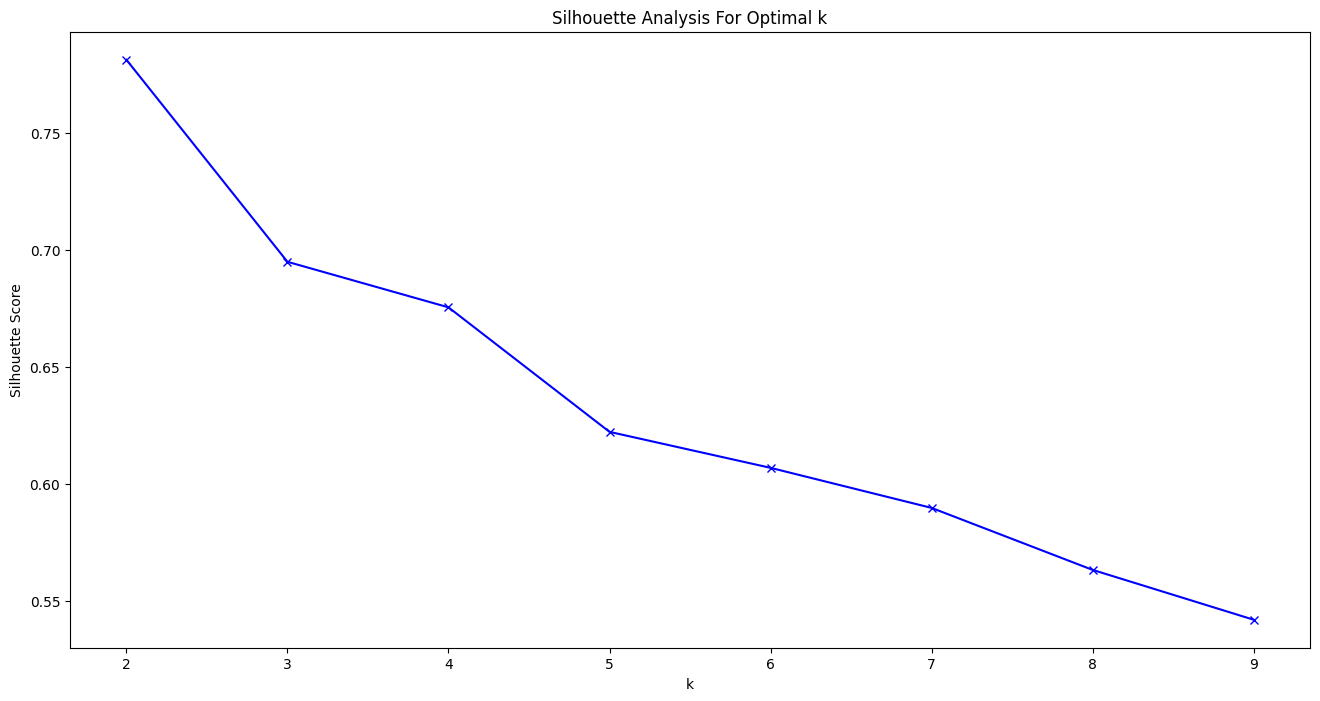

In [279]:
silhouette_avg = []
K = range(2, 10) 
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels = kmeanModel.fit_predict(online_shop)
    silhouette_avg.append(silhouette_score(online_shop, cluster_labels))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

## 4.3 K-means clustering

Apply a K-means clustering algorithm to the data set using a value of K=2.

In [280]:
# Use the KMeans algorithm
model = KMeans(n_clusters = 2)
model.fit(online_shop)

KMeans(n_clusters=2)

# 5. Post-Clustering Exploratory Data Analysis

- ### Cluster Centers
After building the model, we use the model to make predictions and get the classification value of Revenue. Through the above variables and K-means clustering method, we can predict whether the user will buy based on user behavior and characteristics.

In [281]:
print(model.cluster_centers_)

[[5.62486602e+00 2.07730683e+02 1.75562701e+00 1.46309803e+02
  1.35474812e+02 6.09321399e+03 6.52441776e-03 2.07704349e-02
  7.34574016e+00 2.33654877e-01 4.07288317e-02 4.79099678e-01
  1.13612004e-01 3.21543408e-03 6.10932476e-02 1.67202572e-01
  2.35798499e-02 3.64415863e-02 3.64415863e-02 3.85852090e-02
  7.12754555e-01 2.87245445e-01 7.63129689e-01 2.36870311e-01
  4.50160772e-01 8.14576635e-02 1.86495177e-01 8.03858521e-02
  2.01500536e-01 2.33654877e-01 4.25509110e-01 9.86066452e-02
  4.82315113e-02 1.93997856e-01 3.21543408e-03 9.78563773e-01
  1.82207931e-02 9.29260450e-01 8.57449089e-03 1.60771704e-02
  8.57449089e-03 2.46516613e-02 1.28617363e-02]
 [2.04422216e+00 7.04291253e+01 4.01070457e-01 2.53169800e+01
  2.32386593e+01 7.93739777e+02 2.34739352e-02 4.48985506e-02
  5.77002491e+00 2.32517329e-01 4.48363604e-02 2.23830833e-01
  1.42230412e-01 1.58813723e-02 1.62323418e-01 2.81477582e-01
  2.33394753e-02 3.49214706e-02 3.50092130e-02 3.61498640e-02
  5.20838817e-01 4.791

- ### Clustering Results Visualization
Use PCA to reduce the dimensionality of the data to 2D, and then use scatter plots to visualize the clustering results.

In [282]:
labels = model.labels_

# Calculate the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))
print(cluster_sizes)

{0: 933, 1: 11397}


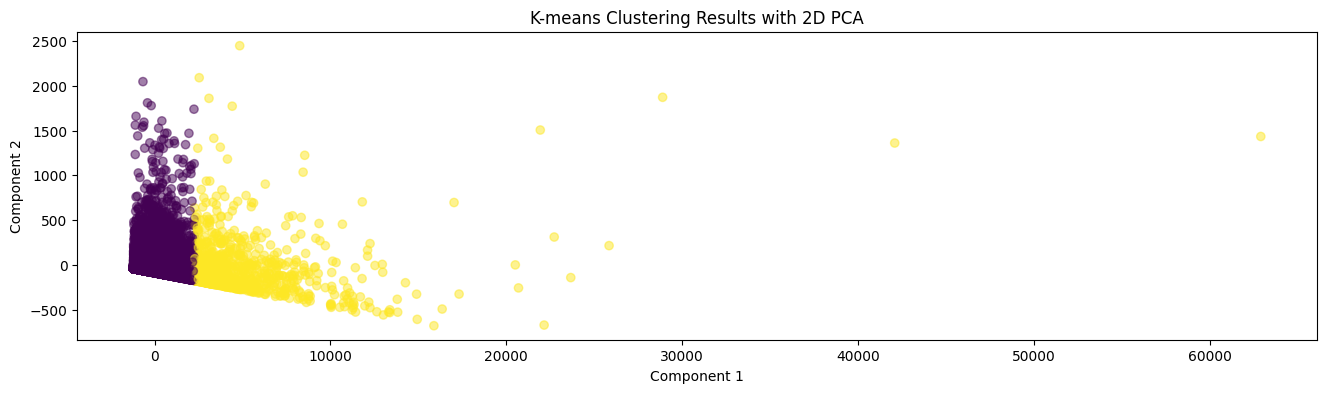

In [ ]:
from sklearn.decomposition import PCA
# Use PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(online_shop)

# Draw clustering results
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('K-means Clustering Results with 2D PCA')
plt.show()

- ### Cluster Size
According to the prediction results of the K-means clustering model, we check the numerical values of the results and visualize them. Here we use barplot to show the distribution of whether they will buy it.

Adding the results to the dataframe

In [ ]:
# Use the predict function to get the 2 clusters
result = model.predict(online_shop)

#Add a new column Revenue
online_shop = online_shop.assign(Revenue=result)

# Check the column cluster
online_shop.groupby("Revenue").agg(["mean", "var"]).T

Revenue                                  0              1
Administrative          mean      2.044222       5.624866
                        var       8.963822      24.498608
Administrative_Duration mean     70.429125     207.730683
                        var   23596.622738  107432.314222
Informational           mean      0.401070       1.755627
...                                    ...            ...
SpecialDay_0.6          var       0.029192       0.008510
SpecialDay_0.8          mean      0.026498       0.024652
                        var       0.025798       0.024070
SpecialDay_1.0          mean      0.012459       0.012862
                        var       0.012305       0.012710

[86 rows x 2 columns]

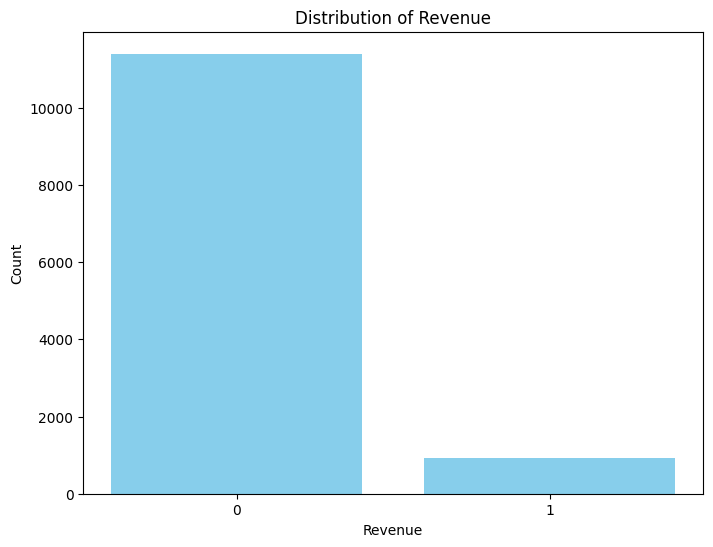

In [ ]:
revenue_counts = online_shop['Revenue'].value_counts()

# plot the bar
plt.figure(figsize=(8, 6))
plt.bar(revenue_counts.index.astype(str), revenue_counts.values, color='skyblue')
plt.xlabel('Revenue') # x lable
plt.ylabel('Count') # y lable
plt.title('Distribution of Revenue') # title
plt.show()

# 6. Clustering Output vs. Actual Labels

First, we import the second dataset from github, rename it, and merge it into our existing dataframe.

In [ ]:
# Read the dataset from github
df_label = pd.read_csv("https://raw.githubusercontent.com/Zhengnan817/DAV-6150/main/Project_2/src/Project2_Data_Labels.csv")

# Rename the column
df_label.rename(columns={"Revenue": "V_Revenue"},inplace=True)

# Update the column V_Revenue
df_label['V_Revenue'].replace({False: 0, True: 1}, inplace=True)

# Combine the df_label with the dataframe
online_shop = pd.concat([online_shop, df_label],axis=1)

online_shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Weekend,...,VisitorType_1,VisitorType_2,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Revenue,V_Revenue
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,True,...,False,True,True,False,False,False,False,False,0,1
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,False,...,True,False,True,False,False,False,False,False,0,0
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,False,...,False,True,True,False,False,False,False,False,0,0
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,False,...,True,False,True,False,False,False,False,False,0,0
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,False,...,True,False,True,False,False,False,False,False,0,0


After that, we show the differences between the predicted valuse and actual values.

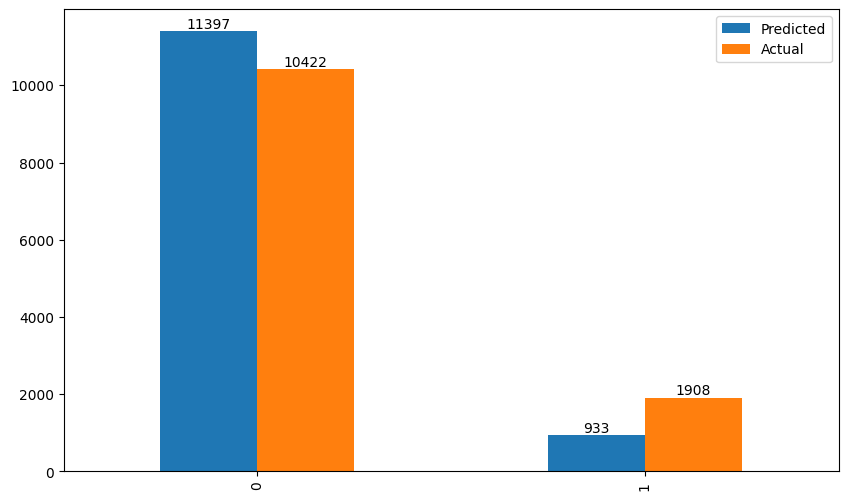

In [ ]:
predicted_counts = online_shop['Revenue'].value_counts().sort_index()
actual_counts = online_shop['V_Revenue'].value_counts().sort_index()

#Create a new DataFrame for plotting
df_counts = pd.DataFrame({'Predicted': predicted_counts, 'Actual': actual_counts})

# Draw a bar chart
ax = df_counts.plot(kind='bar', figsize=(10, 6))

#Add numerical labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()


Lastly, let's calculate the accuracy. We can see that the accuracy is 0.82 which means the model perform well.

In [ ]:
accuracy = accuracy_score(online_shop['V_Revenue'], online_shop['Revenue'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


# 7. SVM Modeling

- ### 7.1 Data preparation
First, we need to prepare the data used for SVM model.

In [ ]:
# Prepare data for the further analysis
df_svm =online_shop.copy()

# Explantory variables
x = df_svm.drop(['Revenue'], axis=1)

# Response variable
y = df_svm[['Revenue']]

- ### 7.2 Feature Selection
Feature selection can reduce the complexity of the model by removing irrelevant or redundant features. This means that the data set will be "cleaner" before SMOTE is applied, and the synthetic samples generated by SMOTE may more accurately reflect the true distribution of the minority class

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use the train_test_split function to get the train and test sets
X_train_v, X_test_v, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
X_train = X_train_v.drop(['V_Revenue'], axis=1)
X_test = X_test_v.drop(['V_Revenue'], axis=1)

In [ ]:

# Instantiate a Logistic Regression model.
# Increase the number of iterations to ensure convergence.
logreg = LogisticRegression(max_iter=1000) 

# Apply RFE to select the 5 most important features.
rfe = RFE(estimator=logreg, n_features_to_select=10) 
rfe = rfe.fit(X_train, y_train.values.ravel()) 

# Gets the column name of the feature selected by RFE
selected_features = X_train.columns[rfe.support_]

# Output the results of RFE.
print("Selected features by RFE:")
print(rfe.support_)
print("Feature ranking (1 indicates selected):")
print(rfe.ranking_)
print("Selected features by RFE (ranking 1):")
print(selected_features)

Selected features by RFE:
[False False False False False False  True  True False False False  True
 False  True  True False False False False False False  True False False
 False False False False False False False False  True False False  True
  True False False False  True False False]
Feature ranking (1 indicates selected):
[30 34  3 33 32 29  1  1 28 23 16  1 24  1  1  5 20  8  9  7  2  1 19 11
 12 25 26 18 21 13 15  4  1 27 10  1  1  6 14 22  1 31 17]
Selected features by RFE (ranking 1):
Index(['BounceRates', 'ExitRates', 'Month_11', 'Month_2', 'Month_3',
       'OperatingSystems_other', 'TrafficType_4', 'VisitorType_1',
       'VisitorType_2', 'SpecialDay_0.6'],
      dtype='object')


- ### 7.3 SMOTE
Based on the results We finally choose ['BounceRates', 'ExitRates', 'Month_11', 'Month_2', 'Month_3',
       'OperatingSystems_other', 'TrafficType_4', 'VisitorType_1',
       'VisitorType_2', 'SpecialDay_0.6'] as our variables for modeling. And we have already seen that the Target is inbalanced. So, we also need SMOTE function to deal with this problems.

In [ ]:
X_train_selected = X_train[selected_features]
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train_selected, y_train)

# Output the data distribution after oversampling
print("Original dataset shape %s" % str(y.shape))
print("Resampled dataset shape %s" % str(y_sm.shape))

X_train = X_sm[['BounceRates', 'ExitRates', 'Month_11', 'Month_2', 'Month_3','OperatingSystems_other', 'TrafficType_4', 'VisitorType_1','VisitorType_2', 'SpecialDay_0.6']]
X_test = X_test[['BounceRates', 'ExitRates', 'Month_11', 'Month_2', 'Month_3','OperatingSystems_other', 'TrafficType_4', 'VisitorType_1','VisitorType_2', 'SpecialDay_0.6']]
y_train = y_sm
y_test = y_test

Original dataset shape (12330, 1)
Resampled dataset shape (18222, 1)


In [ ]:
response_variables = pd.DataFrame(y_sm, columns=['Revenue'])
explainatory_variables = X_train
combined_df = pd.concat([explainatory_variables.reset_index(drop=True), response_variables.reset_index(drop=True)], axis=1)

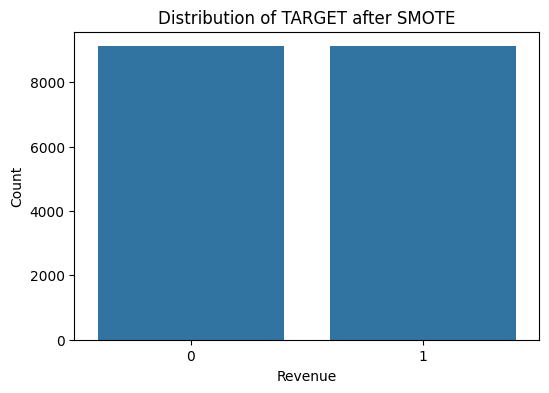

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=response_variables)
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Distribution of TARGET after SMOTE')
plt.show()

In [ ]:
combined_df

,BounceRates,ExitRates,Month_11,Month_2,Month_3,OperatingSystems_other,TrafficType_4,VisitorType_1,VisitorType_2,SpecialDay_0.6,Revenue
0,0.000000,0.025000,False,False,False,False,False,True,False,False,0
1,0.000000,0.014286,False,False,False,False,False,True,False,False,0
2,0.200000,0.200000,False,False,True,False,False,True,False,False,0
3,0.000000,0.050000,False,False,True,True,False,True,False,False,0
4,0.001587,0.012919,False,False,False,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...
18217,0.004355,0.012082,True,False,False,False,False,True,False,False,1
18218,0.010806,0.020364,False,False,False,False,False,True,False,False,1
18219,0.004591,0.014958,True,False,False,True,False,True,False,False,1
18220,0.015935,0.039811,False,False,False,False,False,True,False,False,1


- ### 7.4 SVM Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X1_train = X_train
y1_train = y_train

svm_classifier_1 = SVC(kernel='poly', random_state=24) 
svm_classifier_1.fit(X1_train, y1_train)

SVC(kernel='poly', random_state=24)

In [ ]:
X2_train = X_train
y2_train = y_train

svm_classifier_2 = SVC(kernel='rbf')
svm_classifier_2.fit(X2_train, y2_train)

SVC()

# 8. Select Models
When selecting the best model, we considered several key factors, including the model's precision, recall, f1-score, and support. These metrics give a comprehensive picture of the model's performance, taking into account not only the model's ability to predict positive classes (accuracy and recall), but also the overall accuracy of the model's predicted results (F1 scores). By comparing these metrics across different models, we are able to get a more complete picture of each model's strengths and weaknesses, and select the model that performs best in our particular application scenario.

## 8.1 Model Evaluation


- ### Cross Validation
Using cross_val_score function to evaluate the 2 SVM models.

In [ ]:
accuracy = cross_val_score(svm_classifier_1, X1_train, y1_train, scoring = "accuracy", cv = 5)
recall = cross_val_score(svm_classifier_1, X1_train, y1_train, scoring = "recall", cv = 5)
auc = cross_val_score(svm_classifier_1, X1_train, y1_train, scoring = "roc_auc", cv = 5)
f1 = cross_val_score(svm_classifier_1, X1_train, y1_train, scoring = "f1", cv = 5)
precision = cross_val_score(svm_classifier_1, X1_train, y1_train, scoring = "precision", cv = 5)

model1_summary_svm = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model1_summary_svm = pd.DataFrame(model1_summary_svm,columns=['SVM_Model1'],index=['accuracy','recall','auc','f1','precision'])
model1_summary_svm

,SVM_Model1
accuracy,0.718363
recall,0.809571
auc,0.794961
f1,0.741874
precision,0.684683


In [ ]:
accuracy = cross_val_score(svm_classifier_2, X2_train, y2_train, scoring = "accuracy", cv = 5)
recall = cross_val_score(svm_classifier_2, X2_train, y2_train, scoring = "recall", cv = 5)
auc = cross_val_score(svm_classifier_2, X2_train, y2_train, scoring = "roc_auc", cv = 5)
f1 = cross_val_score(svm_classifier_2, X2_train, y2_train, scoring = "f1", cv = 5)
precision = cross_val_score(svm_classifier_2, X2_train, y2_train, scoring = "precision", cv = 5)

model1_summary_svm = [accuracy.mean(),recall.mean(),auc.mean(),f1.mean(),precision.mean()]
model1_summary_svm = pd.DataFrame(model1_summary_svm,columns=['SVM_Model2'],index=['accuracy','recall','auc','f1','precision'])
model1_summary_svm

,SVM_Model2
accuracy,0.713698
recall,0.791789
auc,0.793668
f1,0.734313
precision,0.685024


## 8.2 Model Selection

In my scenario, I need to predict whether users will make a purchase based on their behavioral characteristics on the page. This is a typical two-classification problem, and when I choose a model, I should decide based on actual business goals and costs.

__Accuracy:__ reflects the proportion of correct predictions by my model. The accuracy of my first model (SVM_Model1) is slightly higher than the second model (SVM_Model2), which means it performs slightly better on all samples.

__Recall:__ Measures my model's ability to identify users who will actually place an order. In my scenario, a high recall means my model captures more potential buyers, which is important for maximizing sales opportunities. My first model has slightly higher recall than the second model.

__AUC:__ Measures the overall performance of my model for classification problems. The AUC values of the two models are very close, indicating that they have similar performance overall.

__F1 Score:__ It is the harmonic average of precision and recall. It is suitable for evaluating model performance when focusing on accurately identifying positive classes and also hoping to reduce misjudgments. The F1 score of my first model is slightly higher than the second model.

__Precision:__ Indicates the proportion of predicted positive classes that are actually positive classes. If my business is more focused on ensuring that users marked as potential buyers actually have a high probability of conversion to avoid wasting resources, then accuracy is an important metric. The two models are comparable in accuracy.

Based on my business goals and analysis of the above metrics, I found that __SVM_Model1__ performed slightly better than SVM_Model2 on most key metrics, which may make it a more suitable choice. If my goal is to maximize the capture of all potential buyers, then it is reasonable to prioritize improving the recall rate, and SVM_Model1 performs better at this point. In addition, considering the importance of F1 score in balancing precision and recall, SVM_Model1 is also a better choice.

## 8.3 Prediction

A machine learning model (especially the support vector machine classifier, svm_classifier_1) was used to predict a test data set (X_test) and the performance of the model was evaluated. Performance evaluation is accomplished by calculating and aggregating multiple key classification metrics, including precision, recall, F1-score, and the area under the receiver operating characteristic curve (AUC).

In [ ]:
# Initialize a list to store weighted average metrics and AUC scores
weighted_avg_metrics = []

# Calculate classification metrics and AUC for svm_classifier_1
predictions_1 = svm_classifier_1.predict(X_test)
report_1 = classification_report(y_test, predictions_1, output_dict=True)
auc_1 = roc_auc_score(y_test, predictions_1)  # Calculate AUC
weighted_avg_metrics.append({'model': 'svm_classifier_1', **report_1['weighted avg'], 'auc': auc_1})

# Create the final DataFrame
final_report = pd.DataFrame(weighted_avg_metrics)

# Reorder the columns as requested
final_report = final_report[['model', 'precision', 'recall', 'f1-score', 'auc']]

final_report

,model,precision,recall,f1-score,auc
0,svm_classifier_1,0.912122,0.628143,0.716458,0.699628


# 9. Clustering + SVM Output vs. Actual Labels

## 9.1 Clustering output vs. Actual Labels

In [ ]:
accuracy = accuracy_score(online_shop['V_Revenue'], online_shop['Revenue'])
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


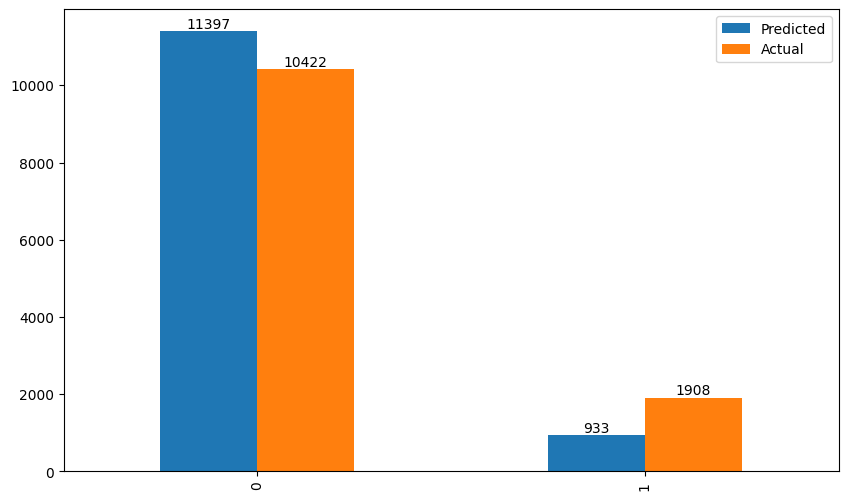

In [ ]:
predicted_counts = online_shop['Revenue'].value_counts().sort_index()
actual_counts = online_shop['V_Revenue'].value_counts().sort_index()

#Create a new DataFrame for plotting
df_counts = pd.DataFrame({'Predicted': predicted_counts, 'Actual': actual_counts})

# Draw a bar chart
ax = df_counts.plot(kind='bar', figsize=(10, 6))

#Add numerical labels
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 9.2 SVM output vs. Actual Lables

In [ ]:
y_pred = pd.DataFrame(predictions_1, columns = ['Revenue'])
v_revenue = pd.DataFrame(X_test_v, columns = ['V_Revenue'])
y_pred.shape,v_revenue.shape

((2466, 1), (2466, 1))

In [ ]:
print(confusion_matrix(v_revenue,y_pred))
print(classification_report(v_revenue,y_pred))

[[1285  838]
 [ 162  181]]
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      2123
           1       0.18      0.53      0.27       343

    accuracy                           0.59      2466
   macro avg       0.53      0.57      0.49      2466
weighted avg       0.79      0.59      0.66      2466



__Accuracy:__ 0.59, which means that overall, the model correctly predicted 59% of the time (whether to buy or not to buy).  
__Precision:__ 0.89 for not buying (category 0) and 0.18 for buying (category 1). This means that the model is relatively accurate when predicting that a user will not buy, but not accurate enough when predicting that a user will buy.  
__Recall:__ 0.61 for non-purchase and 0.53 for purchase. This shows that the model performs better at capturing users who will not buy, but there are still a large number of users who will not buy and are incorrectly predicted to buy; while for users who actually will buy, the model can identify more than half.  
__F1 Score:__ 0.72 for not buying and 0.27 for buying. The F1 score is the harmonic mean of precision and recall, which is more suitable for evaluating model performance in the case of data imbalance. This indicates that the model performs better on predicting users who do not purchase, but performs poorly on predicting users who purchase.

Based on the analysis, even though the model's evaluation scores are not satisfactory, the model is relatively accurate in predicting users who will not make a purchase but less accurate in predicting users who will. This indicates that the model performs well in capturing users who will not purchase, yet a significant number of users who will not buy are incorrectly predicted to be potential buyers.

__This is exactly the result we want. For customers who are not going to make a purchase, we accurately filter them out. For customers who are going to purchase, including those who are potential targets, we ensure not to miss any. This is greatly beneficial for our business analysis.__

# 10. Conclusion

The analysis confirms that the modeling approach aligns with business objectives, particularly in identifying users unlikely to make a purchase with high precision. More importantly, the models capture a significant proportion of potential buyers, including those who may not have been immediately obvious targets. This outcome is highly beneficial for online retailers, as it enables targeted marketing strategies and resource allocation to users most likely to convert, thereby enhancing sales opportunities and optimizing operational efficiency.  
The conclusion suggests that while the results are promising, there is room for further refinement. The potential for exploring alternative clustering algorithms, more sophisticated SVM kernel functions, or even different machine learning models could yield improvements in prediction accuracy and model robustness. Additionally, a deeper dive into feature importance and the impact of different pre-processing techniques could offer further insights into shopper behavior and preferences.  
In summary, the project successfully demonstrates how clustering and SVM modeling can be applied to predict online shopping behaviors. The methodological rigor, combined with a clear alignment with business goals, provides a solid framework for leveraging machine learning in e-commerce analytics. Further explorations and optimizations based on this foundational work could lead to even more targeted and effective strategies for enhancing online retail performance.


# 11. References

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://www.kaggle.com/code/vigneshprakash/online-shoppers-purchasing-intention-pca-smote#SMOTE
- https://patilpushkarp.github.io/online-shoppers-purchasing-intention/docs/models/svm_train.html